In [1]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
# from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
abdose_adult = pd.read_csv('Adult_copy_sample.csv')

In [3]:
num_missing_all = 0

for column in abdose_adult:
    if abdose_adult[column].isnull().sum() == len(abdose_adult):
        num_missing_all += 1
        
# The only missing column is 'CRP' which needs to be filled in        

print('---------------------------------------------------------------------')
print('Number of columns with missing/nonexistent data on every entry: ', num_missing_all)
print('Number of total columns: ', len(abdose_adult.columns))

---------------------------------------------------------------------
Number of columns with missing/nonexistent data on every entry:  0
Number of total columns:  195


In [4]:
# 1 indicates 'success', 0 indicates 'failure' (clinical outcome 2, 3 & 4) 

abdose_adult['fu48_clinical_outcome'] = abdose_adult['fu48_clinical_outcome'].replace(2,0)
abdose_adult['fu48_clinical_outcome'] = abdose_adult['fu48_clinical_outcome'].replace(3,0)
abdose_adult['fu48_clinical_outcome'] = abdose_adult['fu48_clinical_outcome'].replace(4,0)

abdose_adult['fu7_clinical_outcome'] = abdose_adult['fu7_clinical_outcome'].replace(2,0)
abdose_adult['fu7_clinical_outcome'] = abdose_adult['fu7_clinical_outcome'].replace(3,0)

In [9]:
sample_48h = abdose_adult.drop(['fu7_clinical_outcome',
                                'other_antimicrobial2_dose',     # Drop strings
                                'other_antimicrobial4_start',
                                'dose_vasopressor2_admin',
                                'dose_vasopressor3_admin'], axis=1) 

In [13]:
sample_48h = sample_48h.iloc[:,2:]

In [14]:
X = sample_48h.drop(['fu48_clinical_outcome'], axis=1)
Y = sample_48h['fu48_clinical_outcome']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [16]:
regr.predict(X_test)

array([ 0.46653536,  0.27084816,  0.45544695,  0.2292743 ,  0.29247458,
        0.38090664,  0.38817139,  0.19148308,  0.31331054,  0.27765551,
        0.60441535,  0.21088964,  0.40253006,  0.48319422,  0.20046074,
        0.78293868,  0.25794032,  0.40040732,  0.2387999 ,  0.42705387,
        0.54256922,  0.51142887,  0.40205387,  0.29065154,  0.33324439,
        0.29773896,  0.39059813,  0.42034117,  0.80117581,  0.30863938,
        0.21336396,  0.23768295,  0.36337942,  0.18949434,  0.4142886 ,
        0.37710404,  0.26157825,  0.67003546,  0.4243321 ,  0.46102752,
        0.42478556,  0.5408291 ,  0.84062369,  0.30046074,  0.60682057,
        0.3108838 ,  0.37710404,  0.18536123])

In [12]:
sample_48h.head()

Unnamed: 0 record_id   age  sex  height  weight  ethnicity  \
0           0      A001  60.5    1   160.0    48.2         10   
1           1      A002  75.5    1   166.0    70.0          3   
2           2      A003  61.3    0   192.0   120.0         10   
3           3      A004  45.9    0   170.0   127.0          3   
4           4      A005  83.7    1   154.0    81.0          6   

   abdose_abx_1___1  abdose_abx_1___2  abdose_abx_1___3  \
0                 0                 0                 0   
1                 0                 0                 1   
2                 0                 0                 0   
3                 0                 0                 0   
4                 0                 0                 0   

           ...            other_antimicrobial_29  other_antimicrobial_30  \
0          ...                                 0                       0   
1          ...                                 0                       0   
2          ...                                 0                       0   
3          ...                                 0                       0   
4          ...                                 0                       0   

   other_antimicrobial_31  other_antimicrobial_32  other_antimicrobial_33  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   other_antimicrobial_34  other_antimicrobial_35  reason_for_icu_admission_1  \
0                       0                       0                           1   
1                       0                       0                           1   
2                       0                       0                           1   
3                       0                       0                           1   
4                       0                       0                           0   

   reason_for_icu_admission_2  fu48_clinical_outcome  
0                           0                      1  
1                           0                      0  
2                           0                      0  
3                           0                      0  
4                           1                      1  

[5 rows x 190 columns]

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


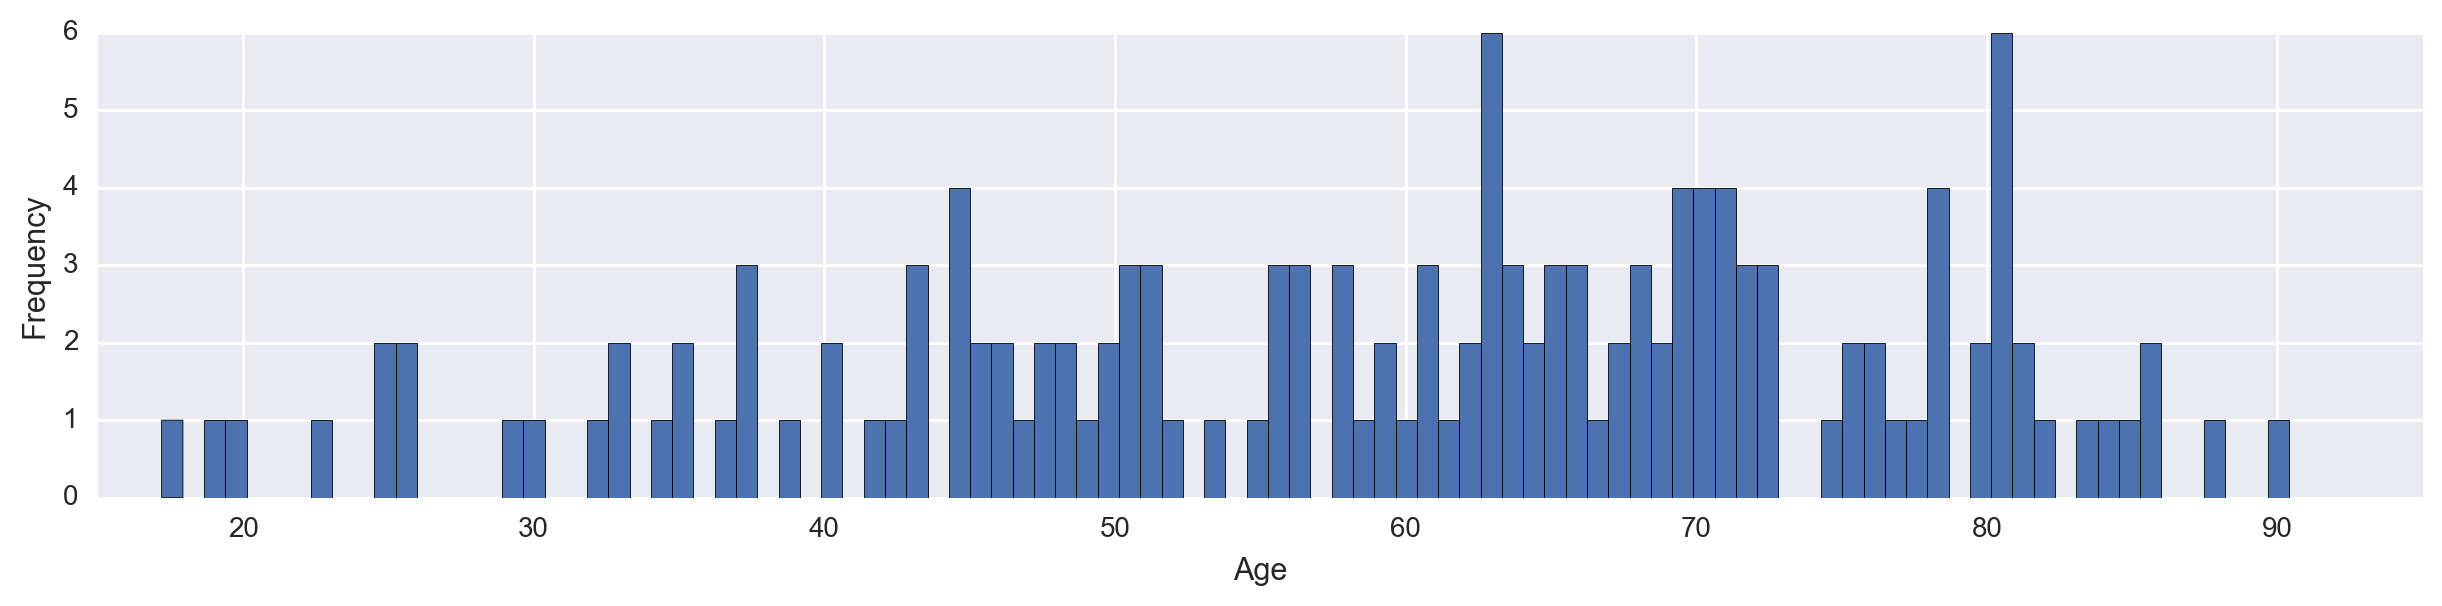

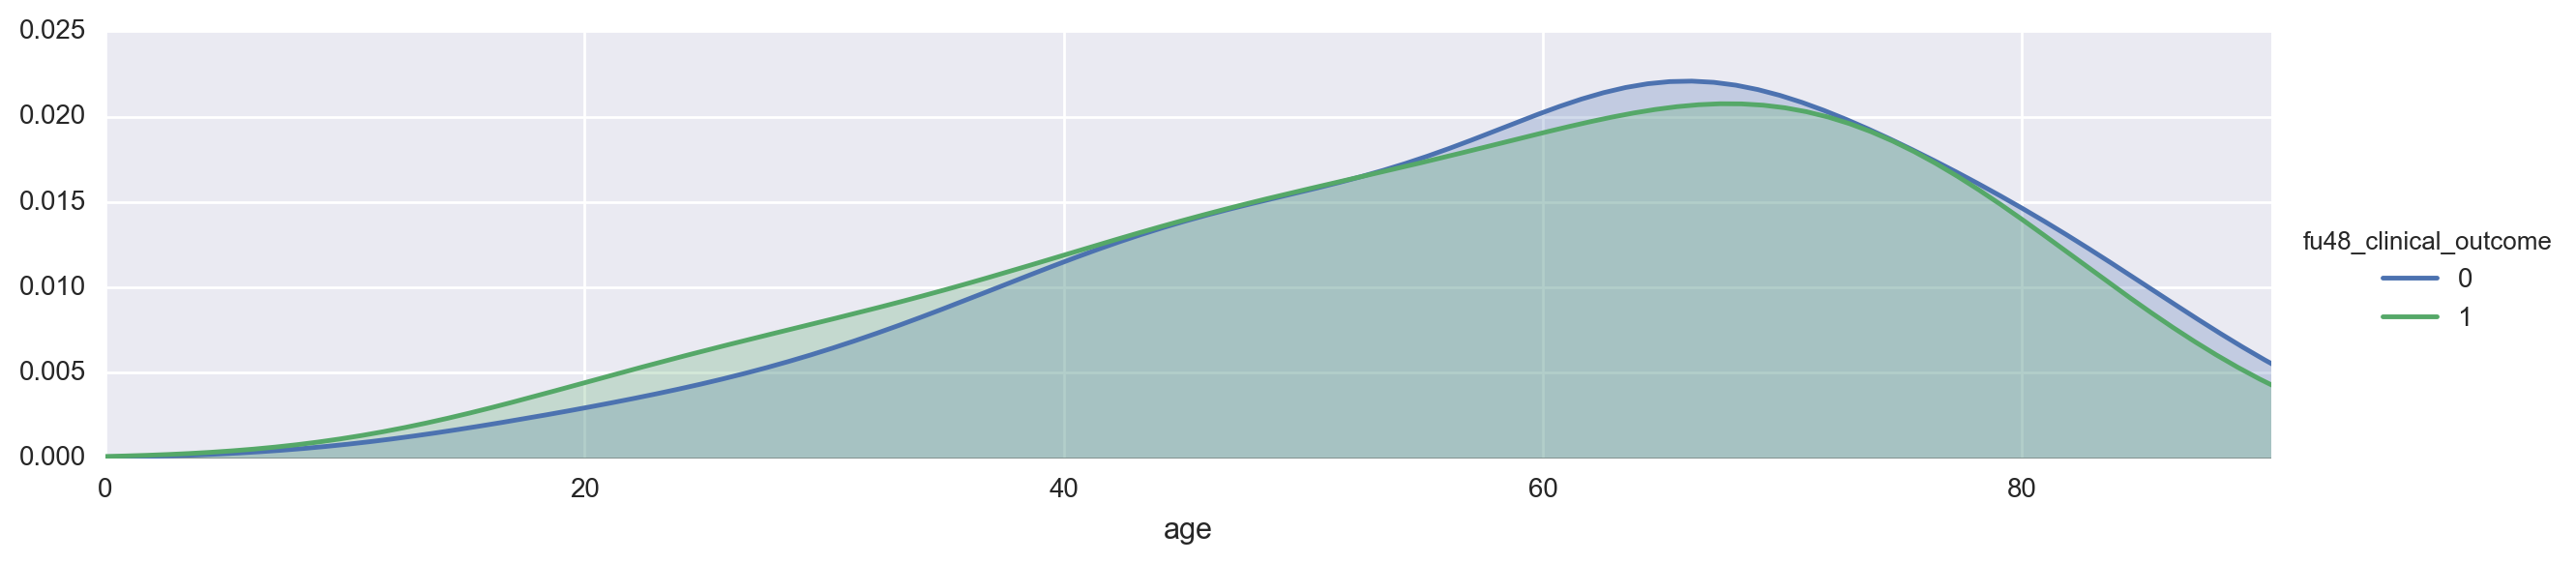

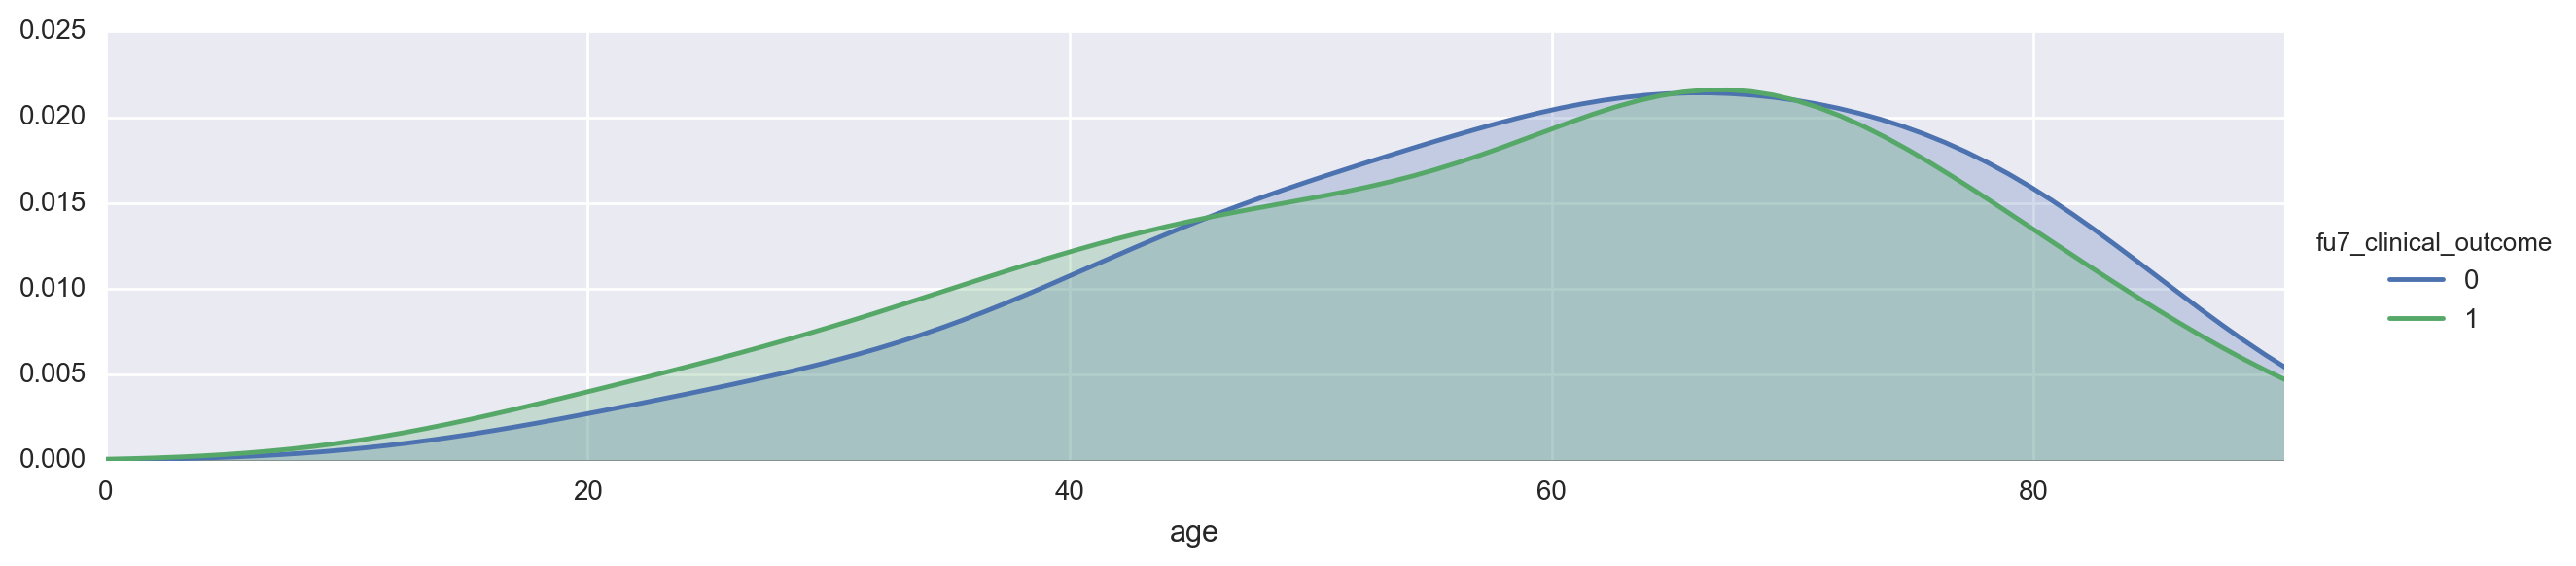

In [5]:
abdose_adult['age'].plot(kind='hist', bins=100, figsize=(15,3), xlim=(15, 95))
plt.xlabel('Age')

ax1 = sns.FacetGrid(abdose_adult, hue='fu48_clinical_outcome',aspect=4)
ax1.map(sns.kdeplot,'age',shade= True)
ax1.set(xlim=(0, abdose_adult['age'].max()))
ax1.add_legend()

ax2 = sns.FacetGrid(abdose_adult, hue='fu7_clinical_outcome',aspect=4)
ax2.map(sns.kdeplot,'age',shade= True)
ax2.set(xlim=(0, abdose_adult['age'].max()))
ax2.add_legend()

[<matplotlib.text.Text at 0x12050e710>, <matplotlib.text.Text at 0x120e10be0>]

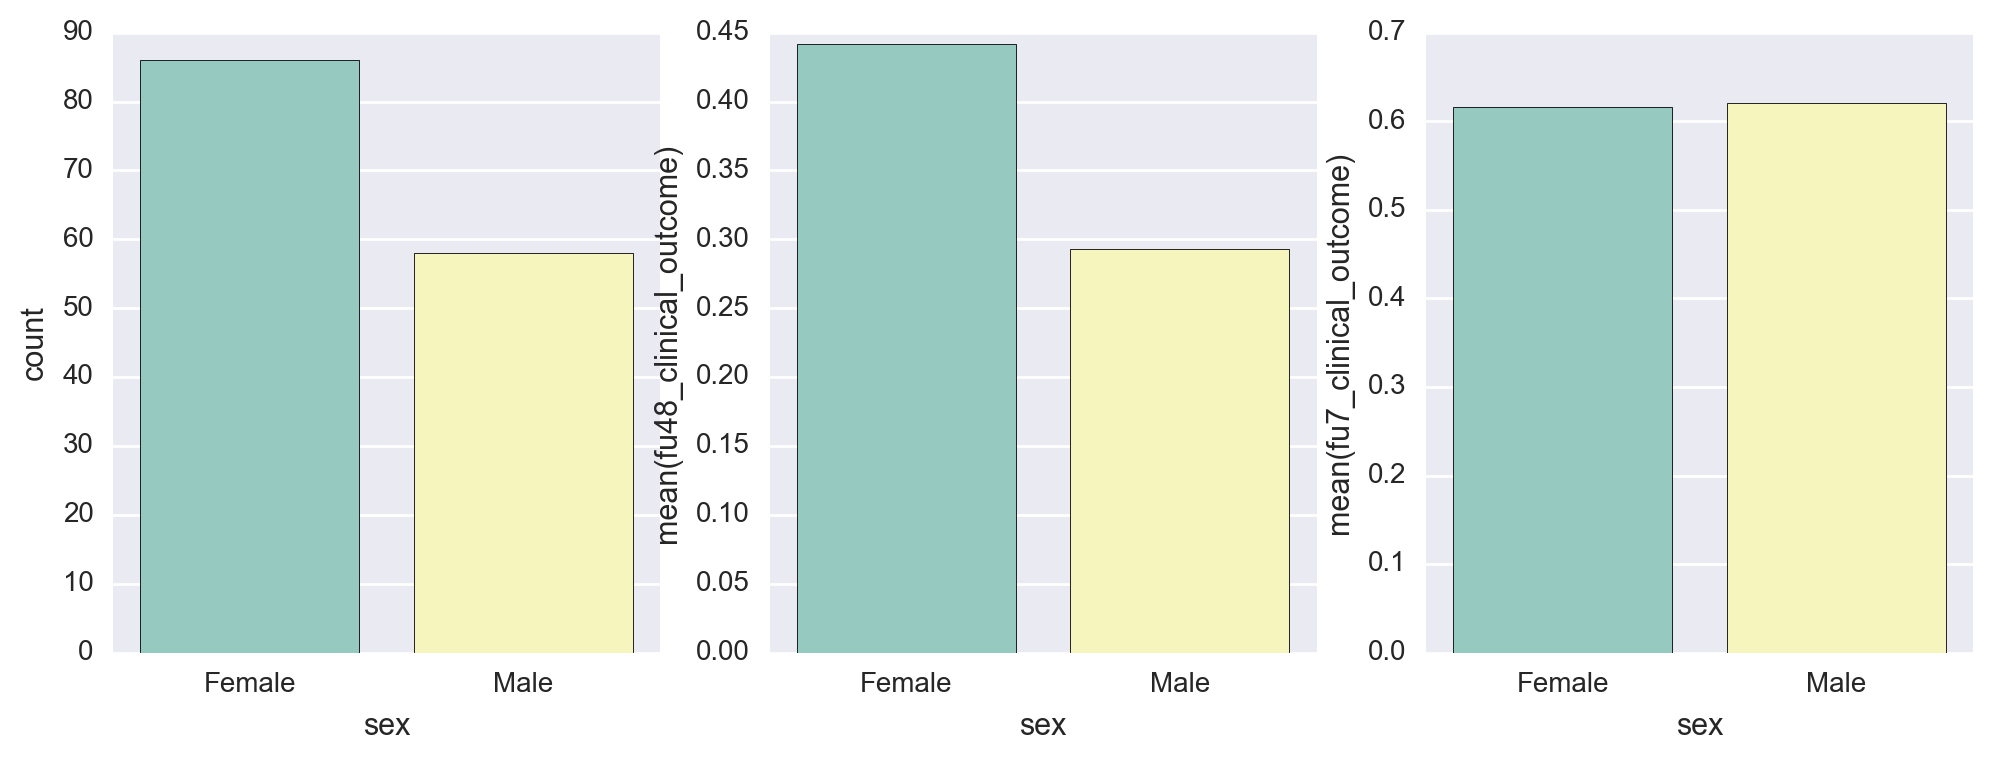

In [6]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, sharex=True, figsize=(12,4))

sns.countplot(x='sex', data=abdose_adult, order=[0, 1], palette='Set3', ax=axis1)
gender_48h = abdose_adult[['sex', 'fu48_clinical_outcome']].groupby(['sex'], as_index=False).mean()
gender_7d  = abdose_adult[['sex', 'fu7_clinical_outcome']].groupby(['sex'], as_index=False).mean()
sns.barplot(x='sex', y='fu48_clinical_outcome', data=gender_48h, order=[0, 1], palette='Set3', ax=axis2)
sns.barplot(x='sex', y='fu7_clinical_outcome', data=gender_7d, order=[0, 1], palette='Set3', ax=axis3)

axis1.set_xticklabels(['Female', 'Male'], rotation=0)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


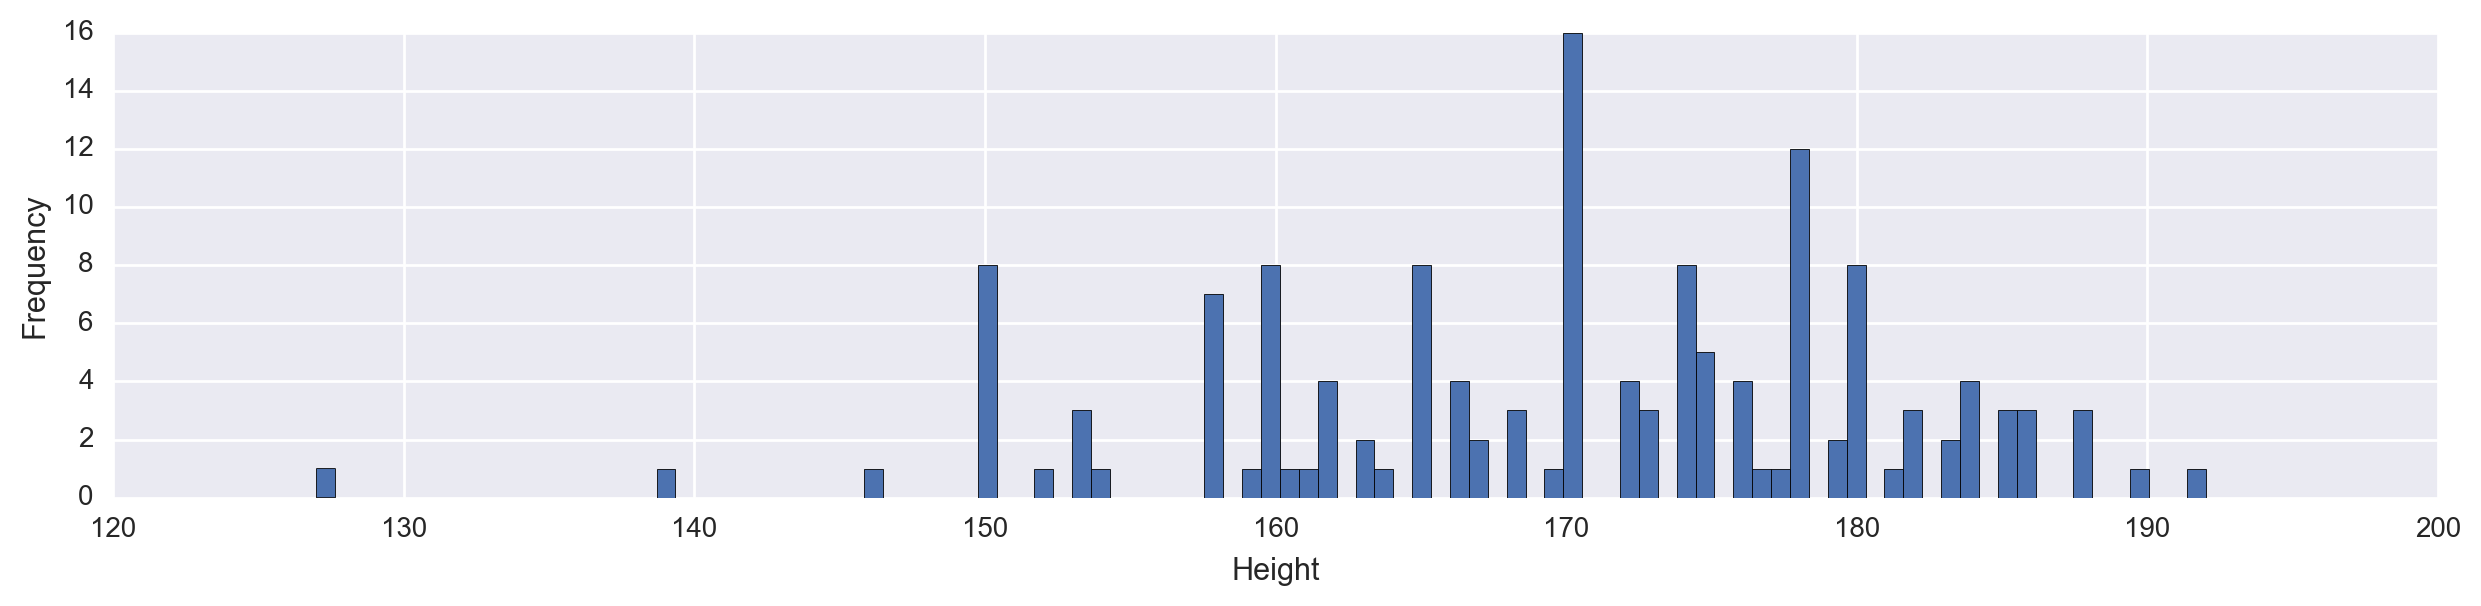

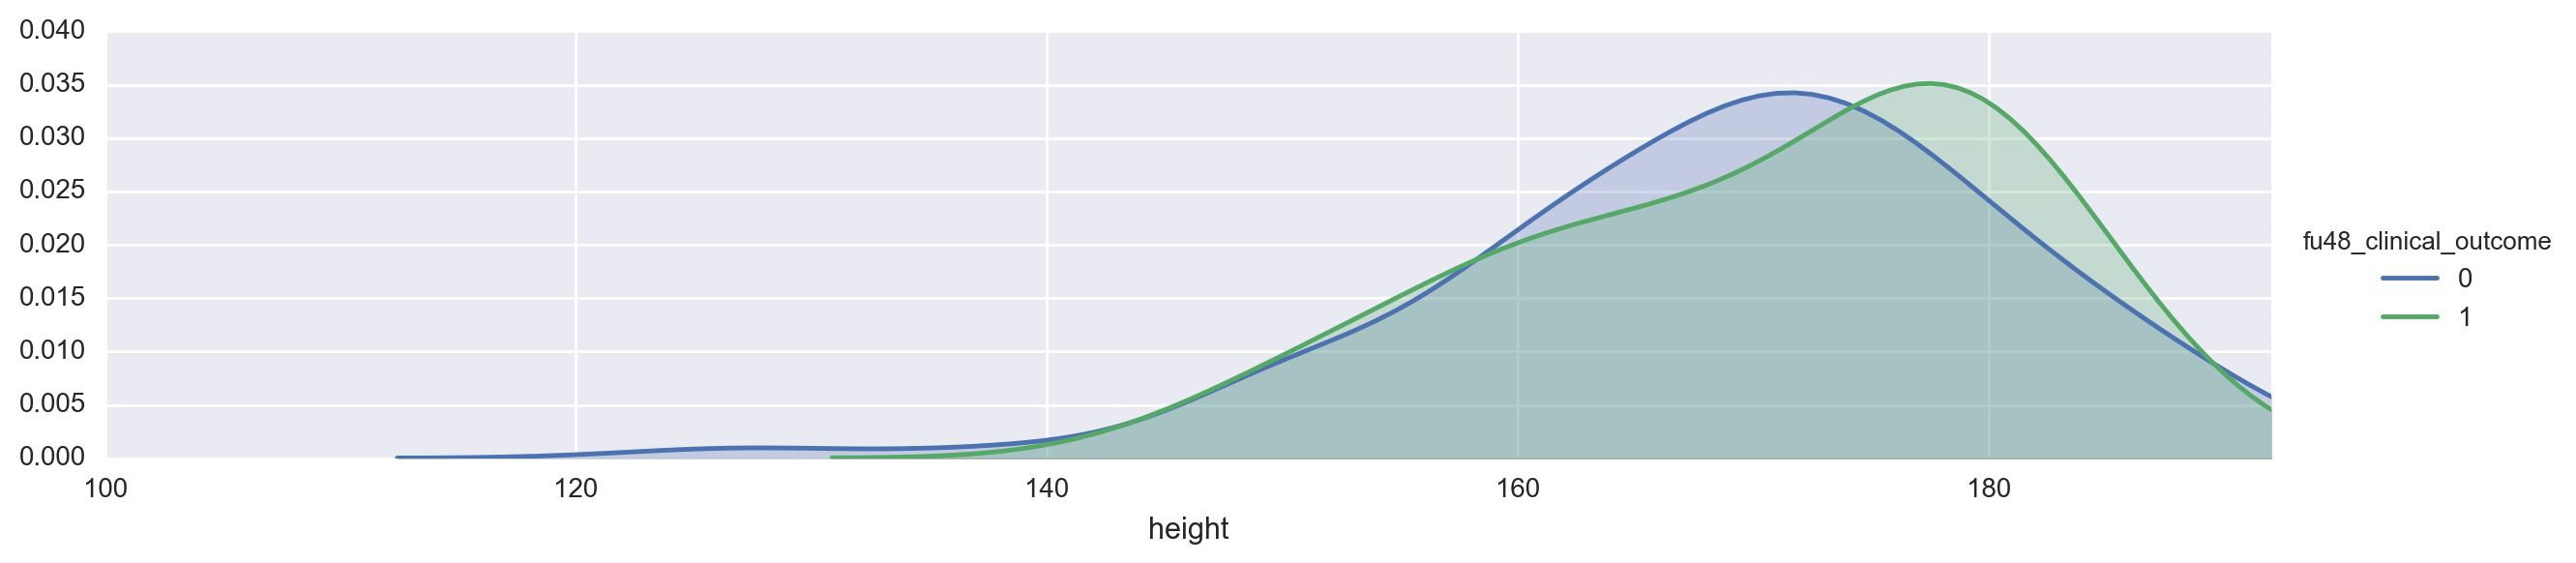

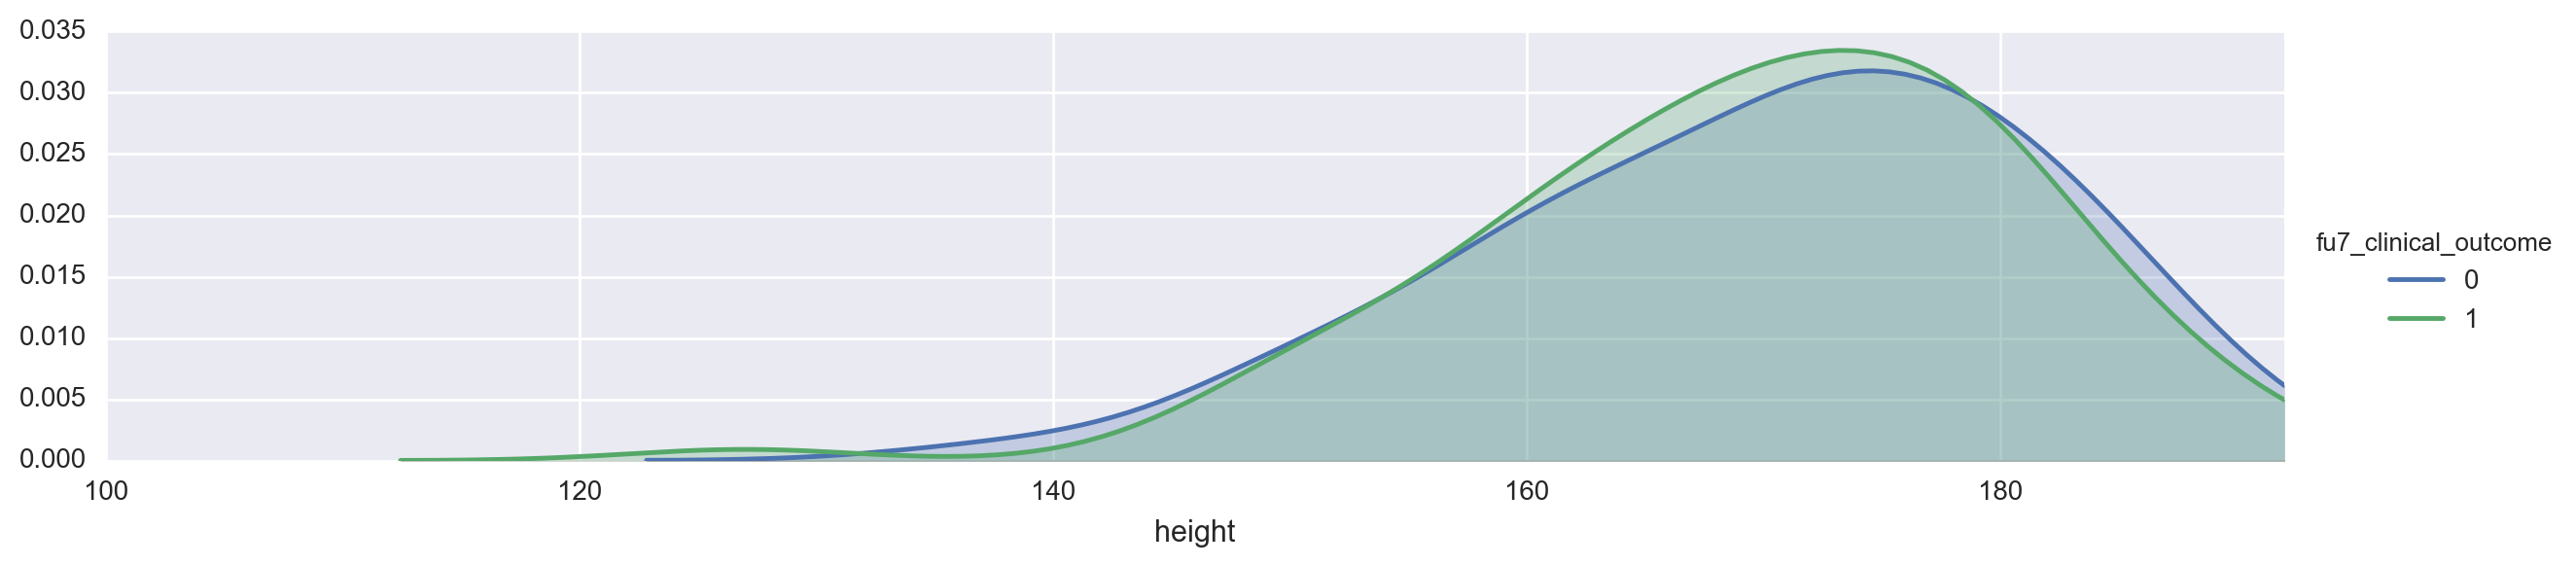

In [7]:
abdose_adult['height'].plot(kind='hist', bins=100, figsize=(15,3))
plt.xlabel('Height')

ax1 = sns.FacetGrid(abdose_adult, hue='fu48_clinical_outcome',aspect=4)
ax1.map(sns.kdeplot,'height',shade= True)
ax1.set(xlim=(100, abdose_adult['height'].max()))
ax1.add_legend()

ax2 = sns.FacetGrid(abdose_adult, hue='fu7_clinical_outcome',aspect=4)
ax2.map(sns.kdeplot,'height',shade= True)
ax2.set(xlim=(100, abdose_adult['height'].max()))
ax2.add_legend()
# BMI

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


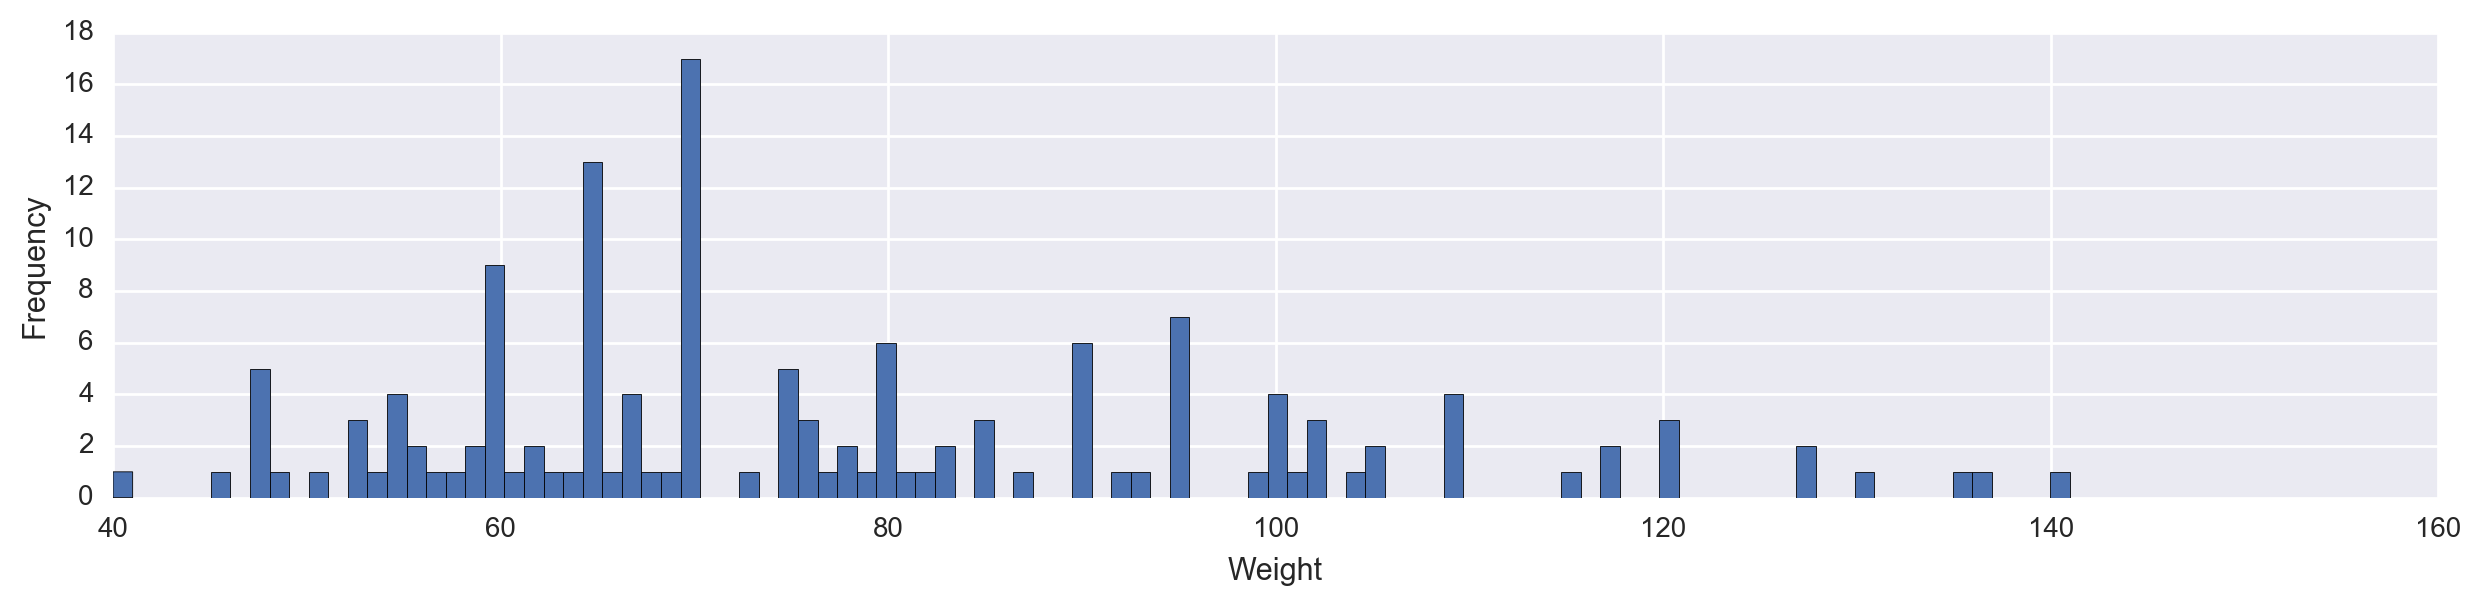

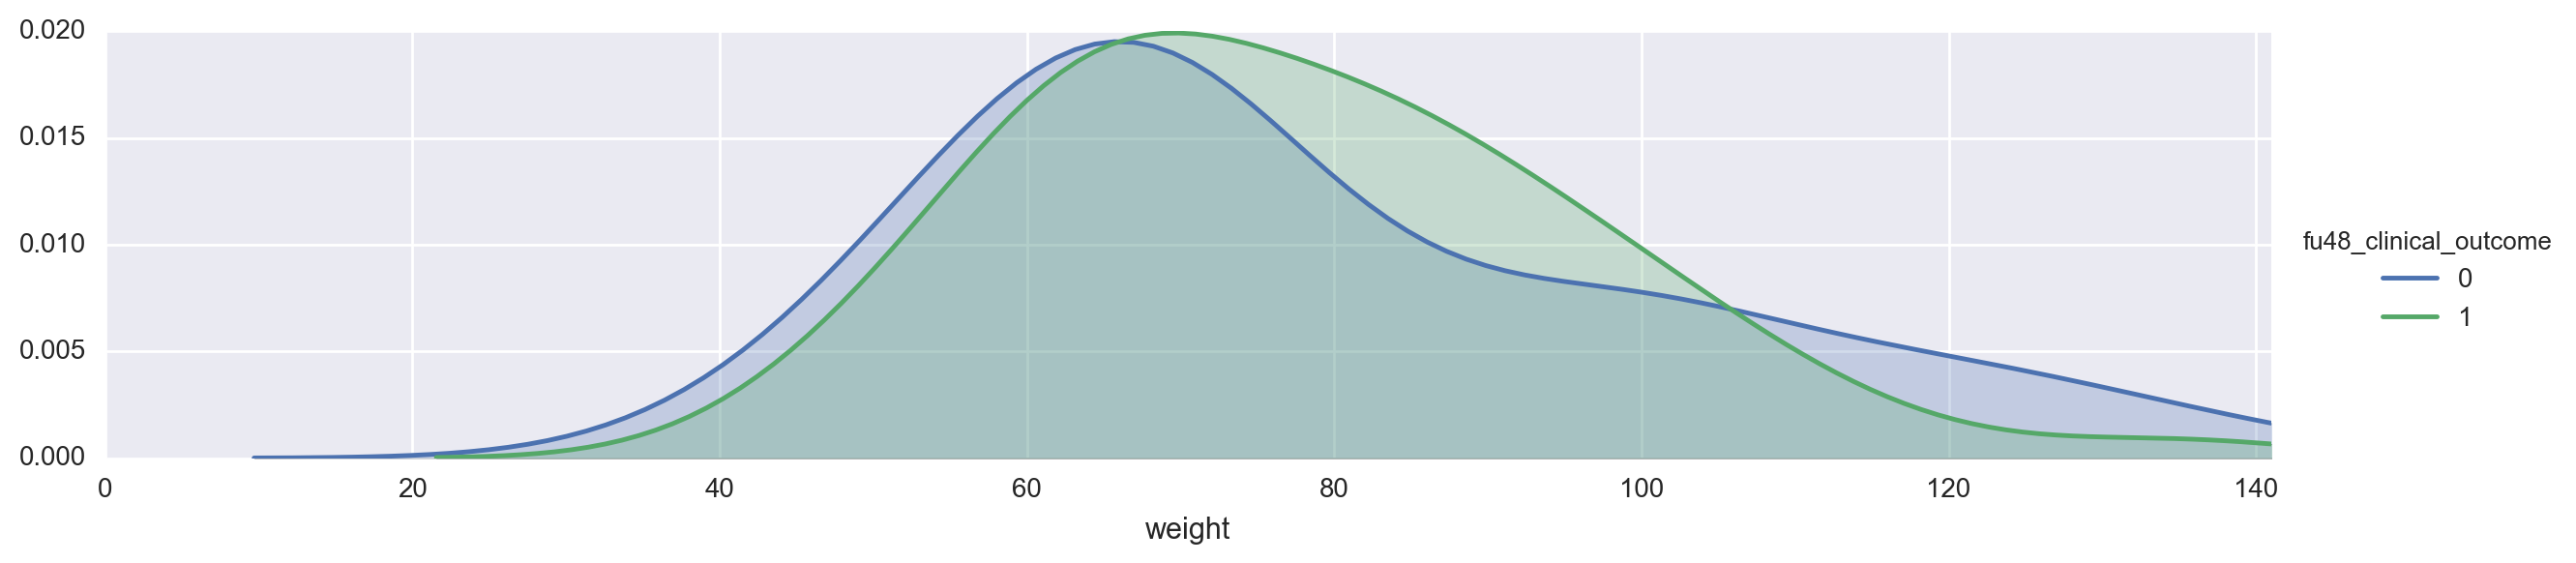

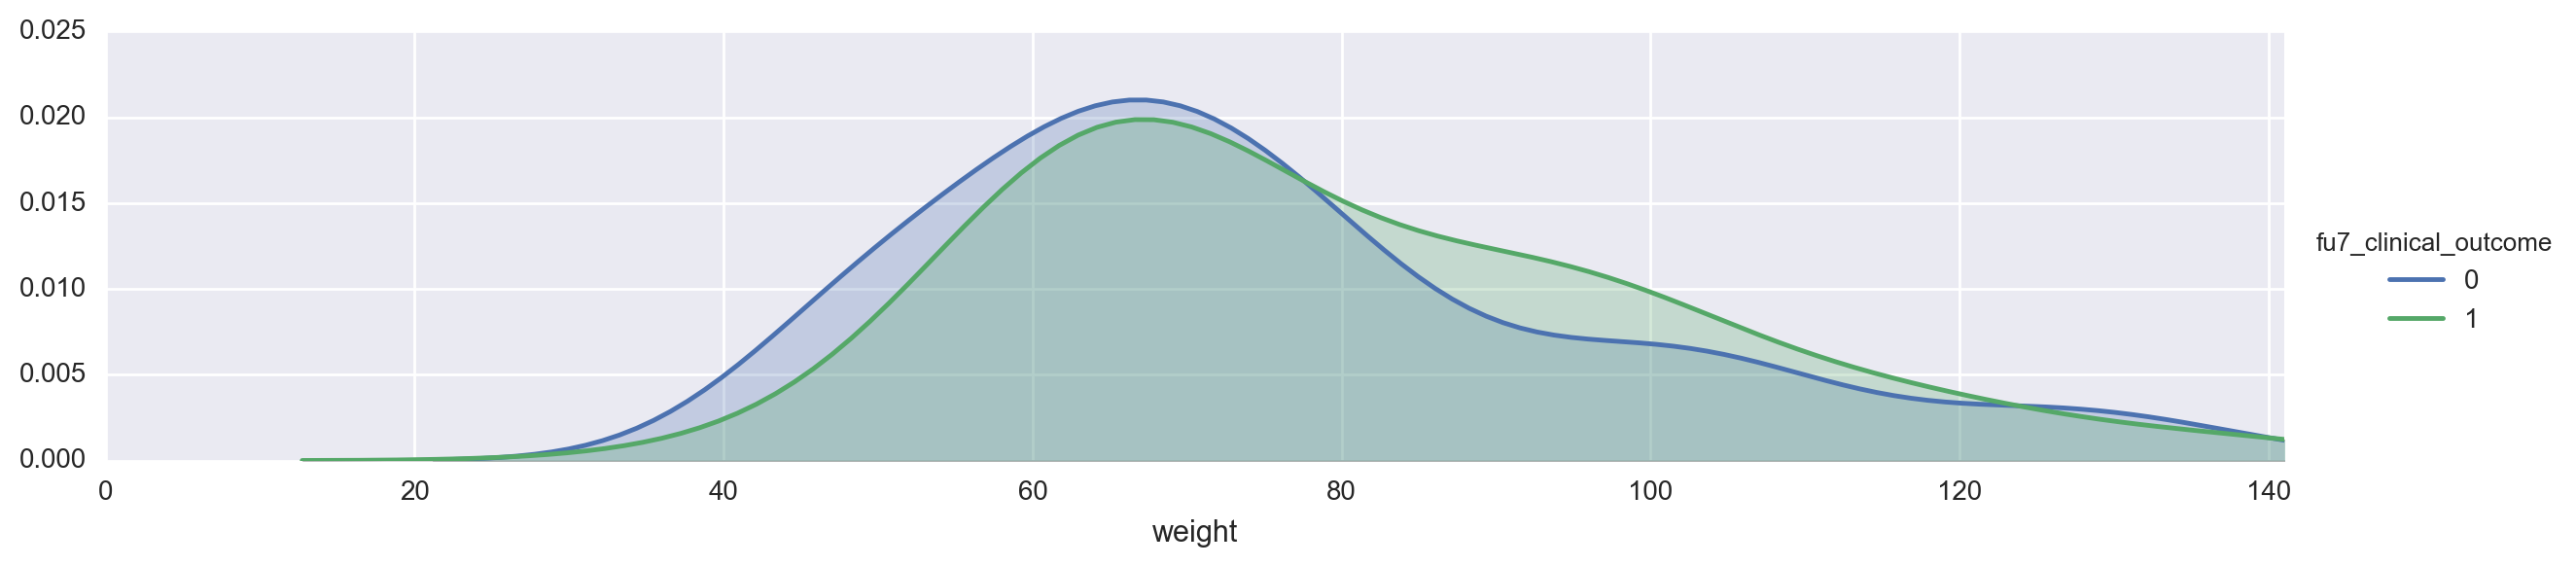

In [8]:
abdose_adult['weight'].plot(kind='hist', bins=100, figsize=(15,3))
plt.xlabel('Weight')

ax1 = sns.FacetGrid(abdose_adult, hue='fu48_clinical_outcome',aspect=4)
ax1.map(sns.kdeplot,'weight',shade= True)
ax1.set(xlim=(0, abdose_adult['weight'].max()))
ax1.add_legend()

ax2 = sns.FacetGrid(abdose_adult, hue='fu7_clinical_outcome',aspect=4)
ax2.map(sns.kdeplot,'weight',shade= True)
ax2.set(xlim=(0, abdose_adult['weight'].max()))
ax2.add_legend()

In [22]:
bmi = abdose_adult['weight']/((abdose_adult['height']/100)**2)
bmi = bmi.to_frame(name='bmi')
abdose_adult = pd.concat([abdose_adult,
                          bmi], axis=1)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


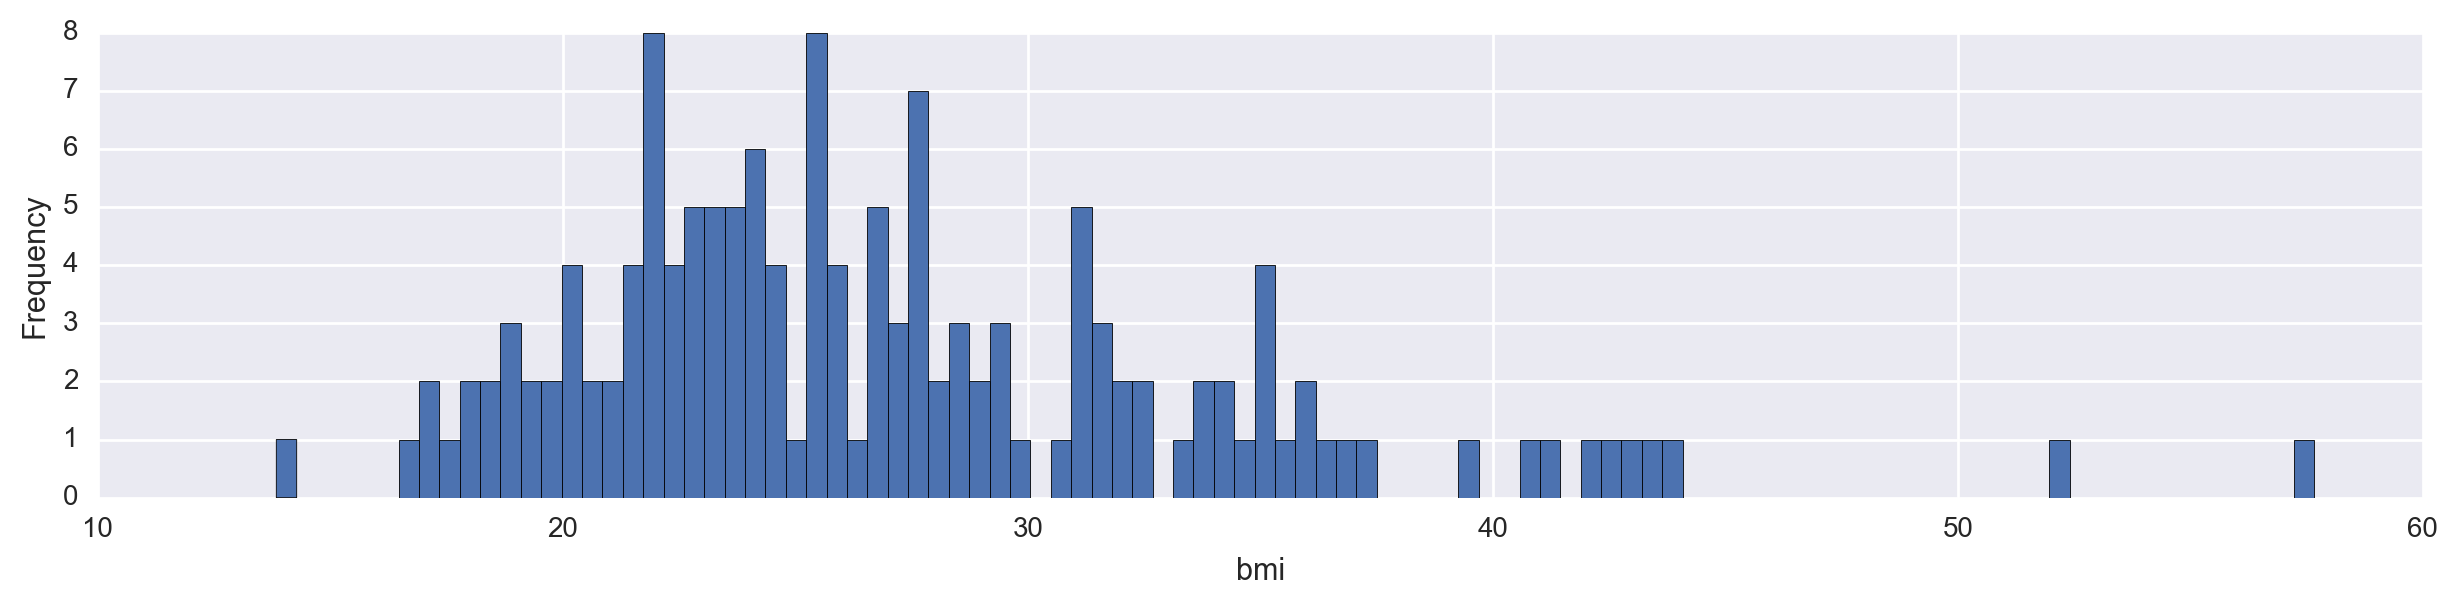

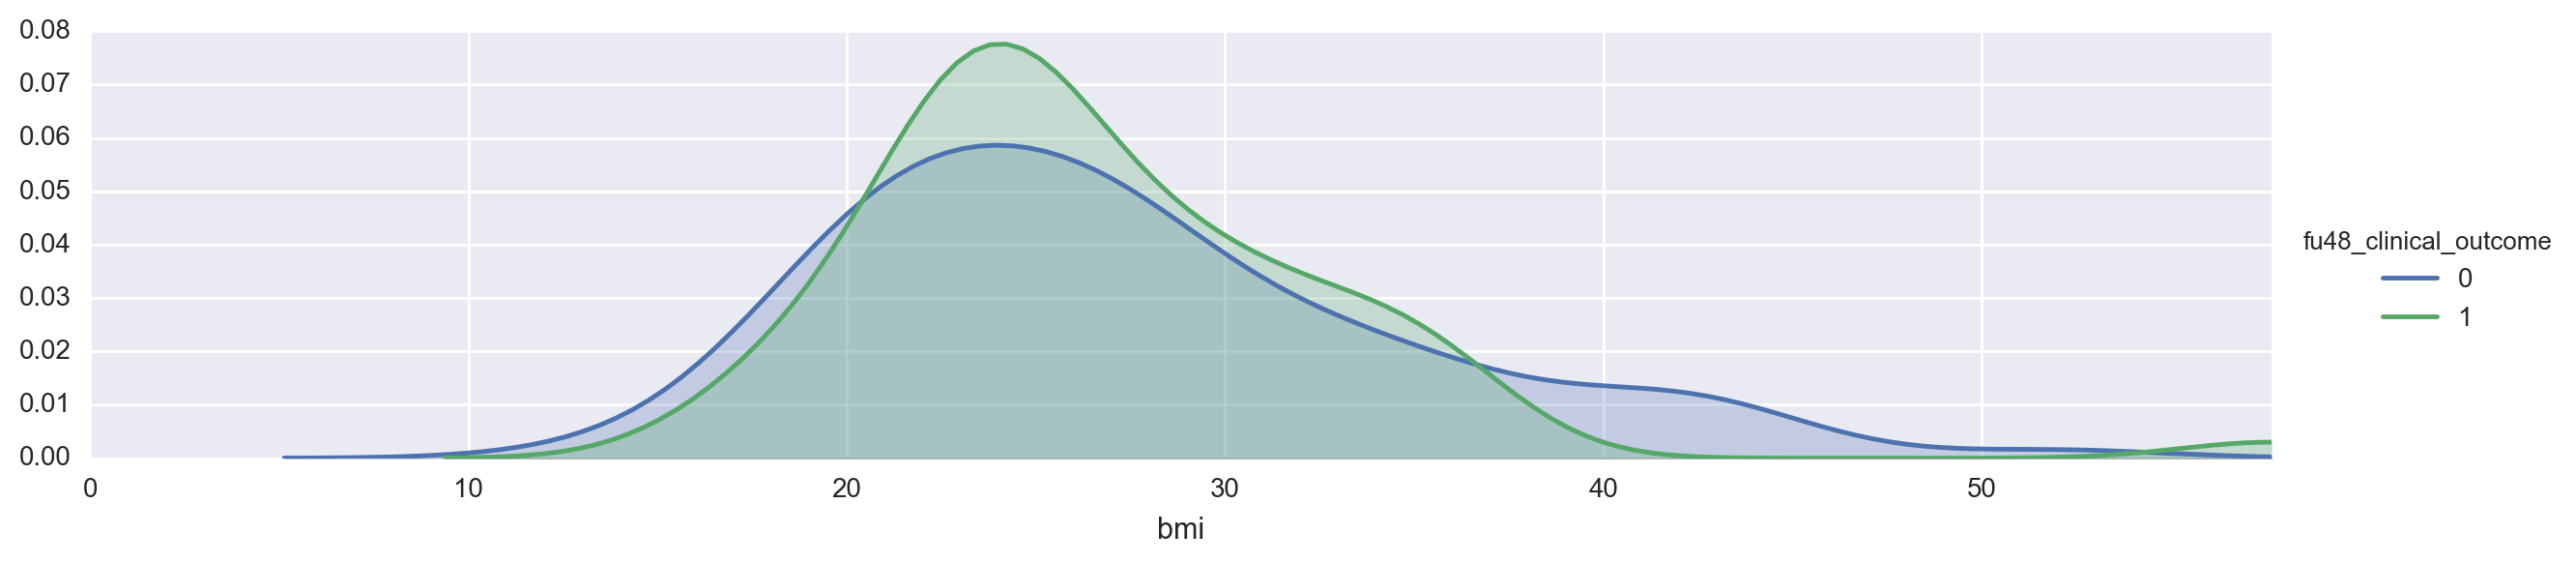

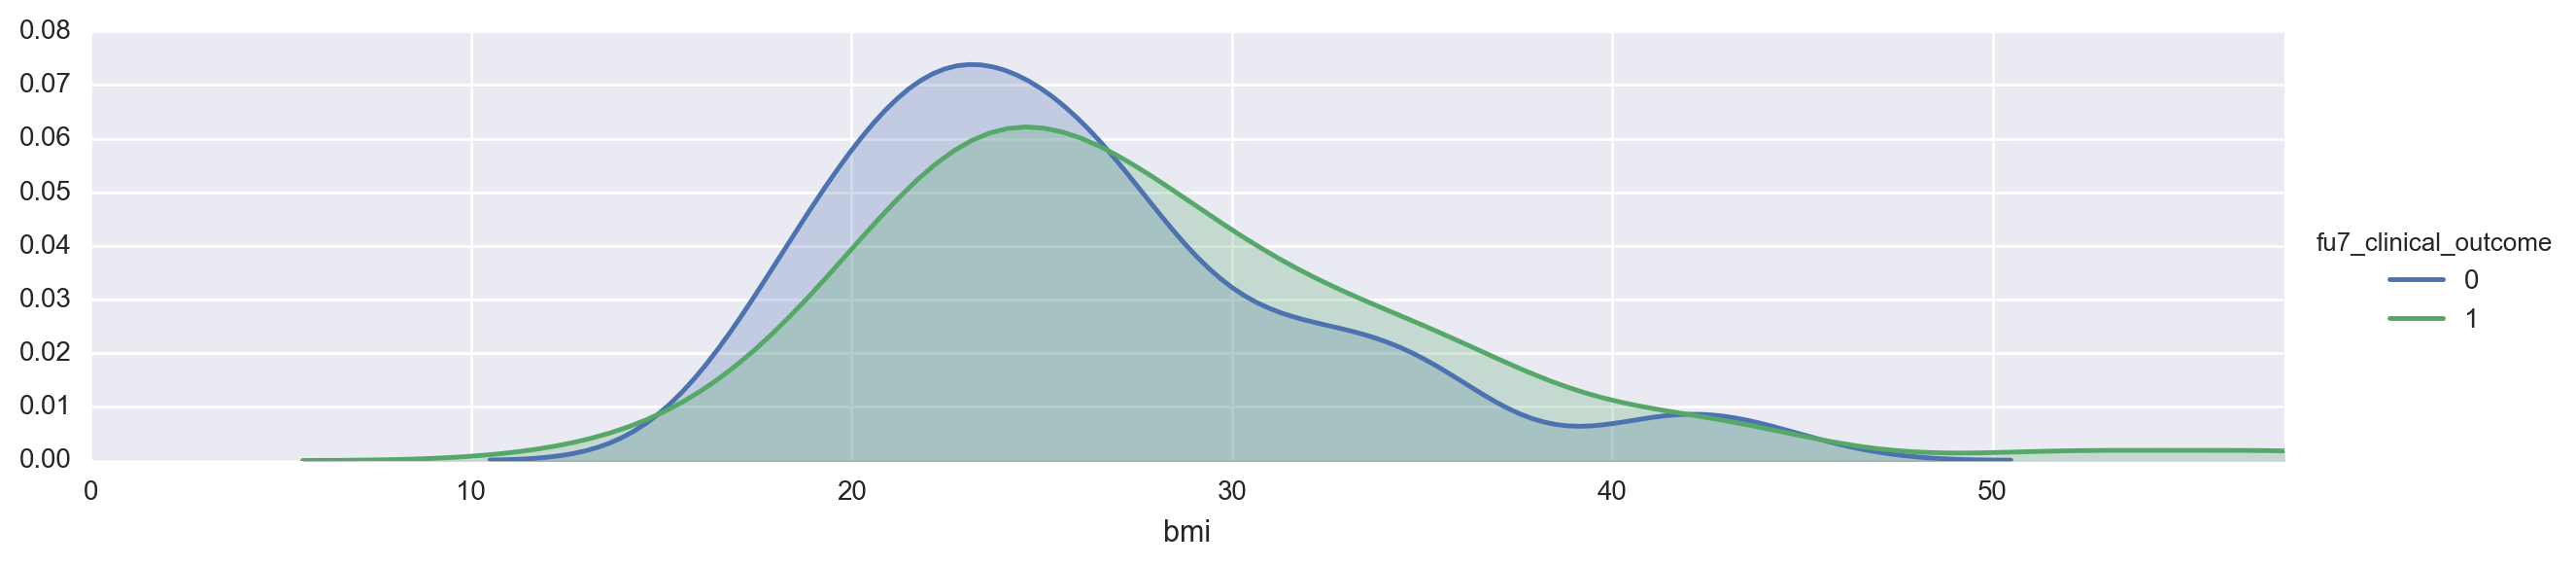

In [23]:
abdose_adult['bmi'].plot(kind='hist', bins=100, figsize=(15,3))
plt.xlabel('bmi')

ax1 = sns.FacetGrid(abdose_adult, hue='fu48_clinical_outcome',aspect=4)
ax1.map(sns.kdeplot,'bmi',shade= True)
ax1.set(xlim=(0, abdose_adult['bmi'].max()))
ax1.add_legend()

ax2 = sns.FacetGrid(abdose_adult, hue='fu7_clinical_outcome',aspect=4)
ax2.map(sns.kdeplot,'bmi',shade= True)
ax2.set(xlim=(0, abdose_adult['bmi'].max()))
ax2.add_legend()

(-0.5, 9.5, 0, 1)

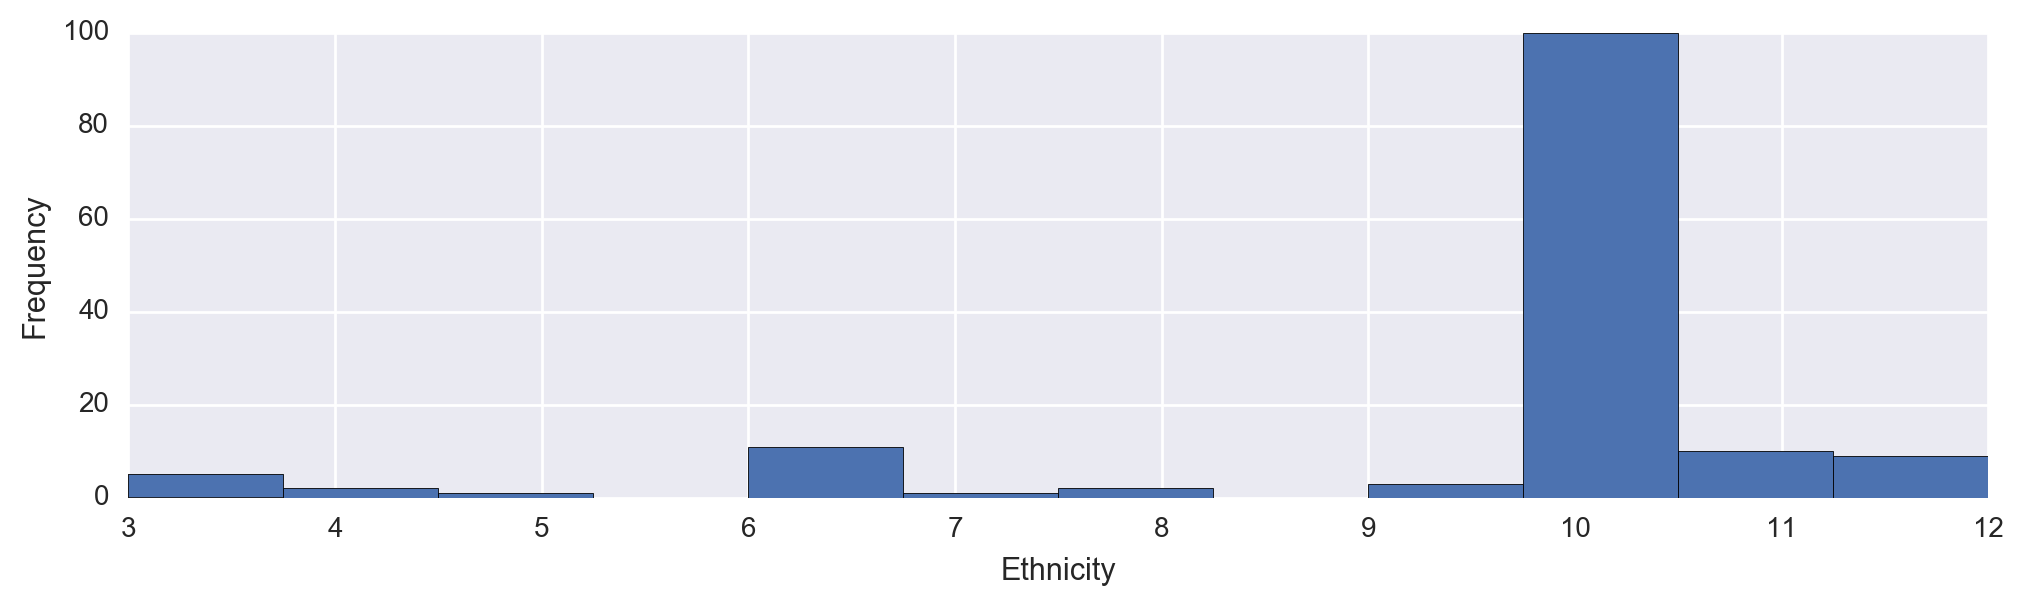

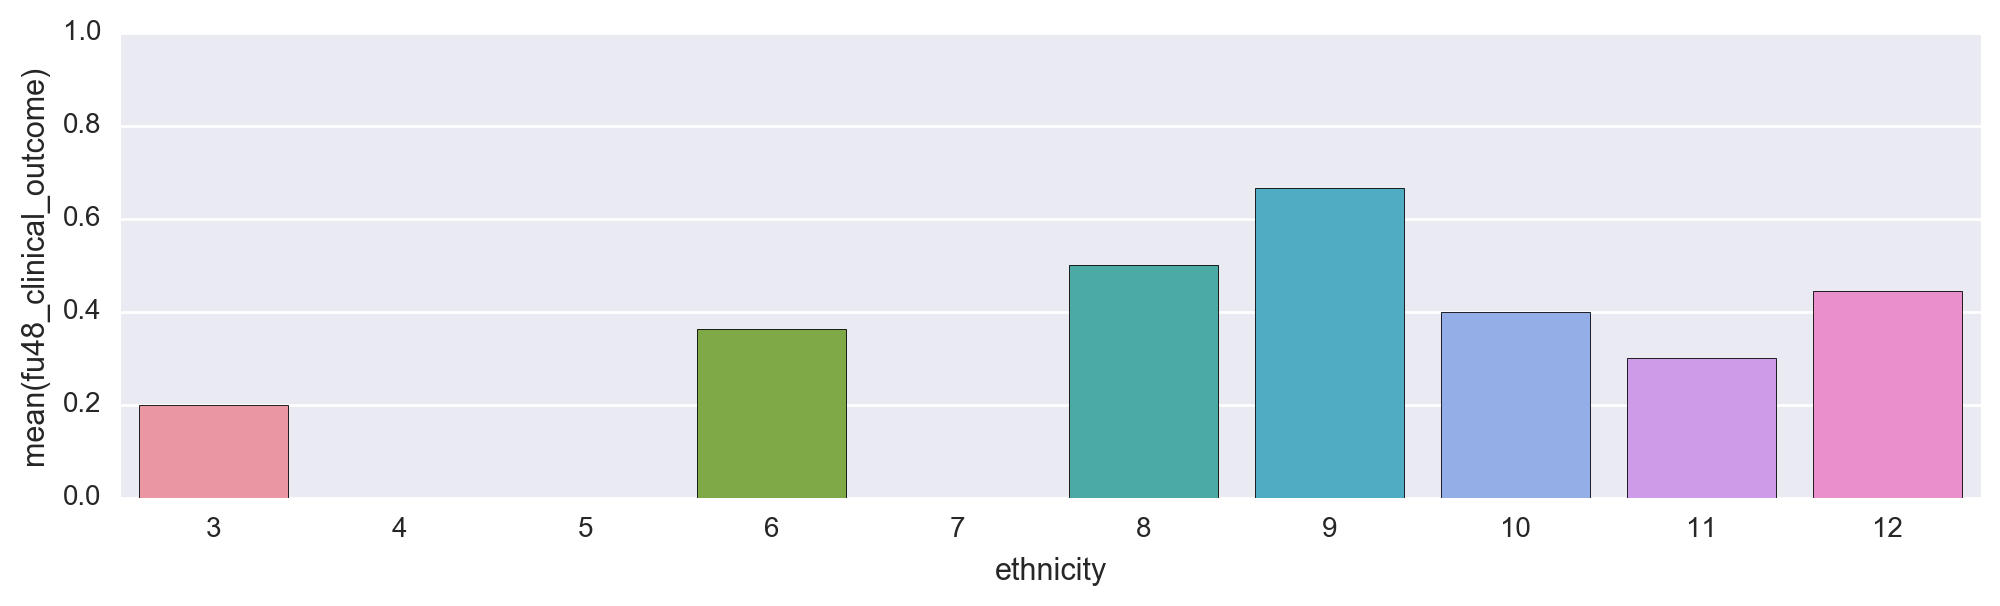

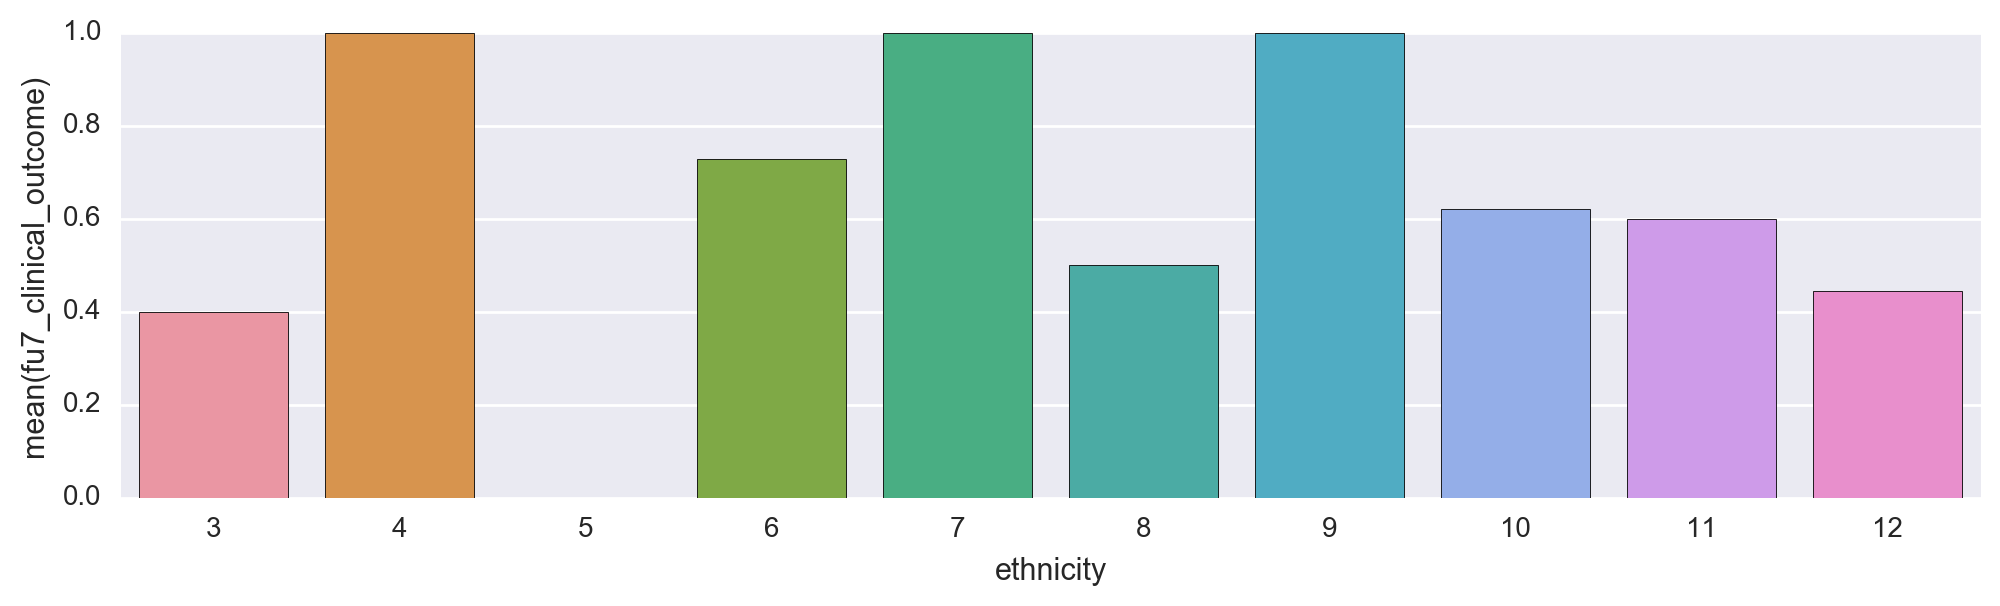

In [9]:
abdose_adult['ethnicity'].plot(kind='hist', bins=12, figsize=(12,3))
plt.xlabel('Ethnicity')

fig, ax1 = plt.subplots(figsize=(12,3))
avg_eth = abdose_adult[['ethnicity', 'fu48_clinical_outcome']].groupby(['ethnicity'], as_index=False).mean()
fig = sns.barplot(x='ethnicity', y='fu48_clinical_outcome',data=avg_eth)
fig.axis(ymin=0, ymax=1)

fig, ax2 = plt.subplots(figsize=(12,3))
avg_eth = abdose_adult[['ethnicity', 'fu7_clinical_outcome']].groupby(['ethnicity'], as_index=False).mean()
fig = sns.barplot(x='ethnicity', y='fu7_clinical_outcome',data=avg_eth)
fig.axis(ymin=0, ymax=1)

In [10]:
abdose_adult['icuadmin_crp'] = abdose_adult['icuadmin_crp'].fillna(abdose_adult['icuadmin_crp'].median())
abdose_adult = abdose_adult.iloc[:,2:]
# abdose_adult['baseline_haem'] = abdose_adult['baseline_haem'].astype(int)

In [11]:
sample_48h = abdose_adult.drop(['fu7_clinical_outcome',
                                'CRP',
                                'other_antimicrobial2_dose',     # Drop strings
                                'other_antimicrobial4_start',
                                'dose_vasopressor2_admin',
                                'dose_vasopressor3_admin',
                                'hospadmin_crp'], axis=1)       


sample_7d  = abdose_adult.drop(['fu48_clinical_outcome',
                                'CRP',
                                'other_antimicrobial2_dose',     # Drop strings
                                'other_antimicrobial4_start',
                                'dose_vasopressor2_admin',
                                'dose_vasopressor3_admin',
                                'hospadmin_crp'], axis=1) 

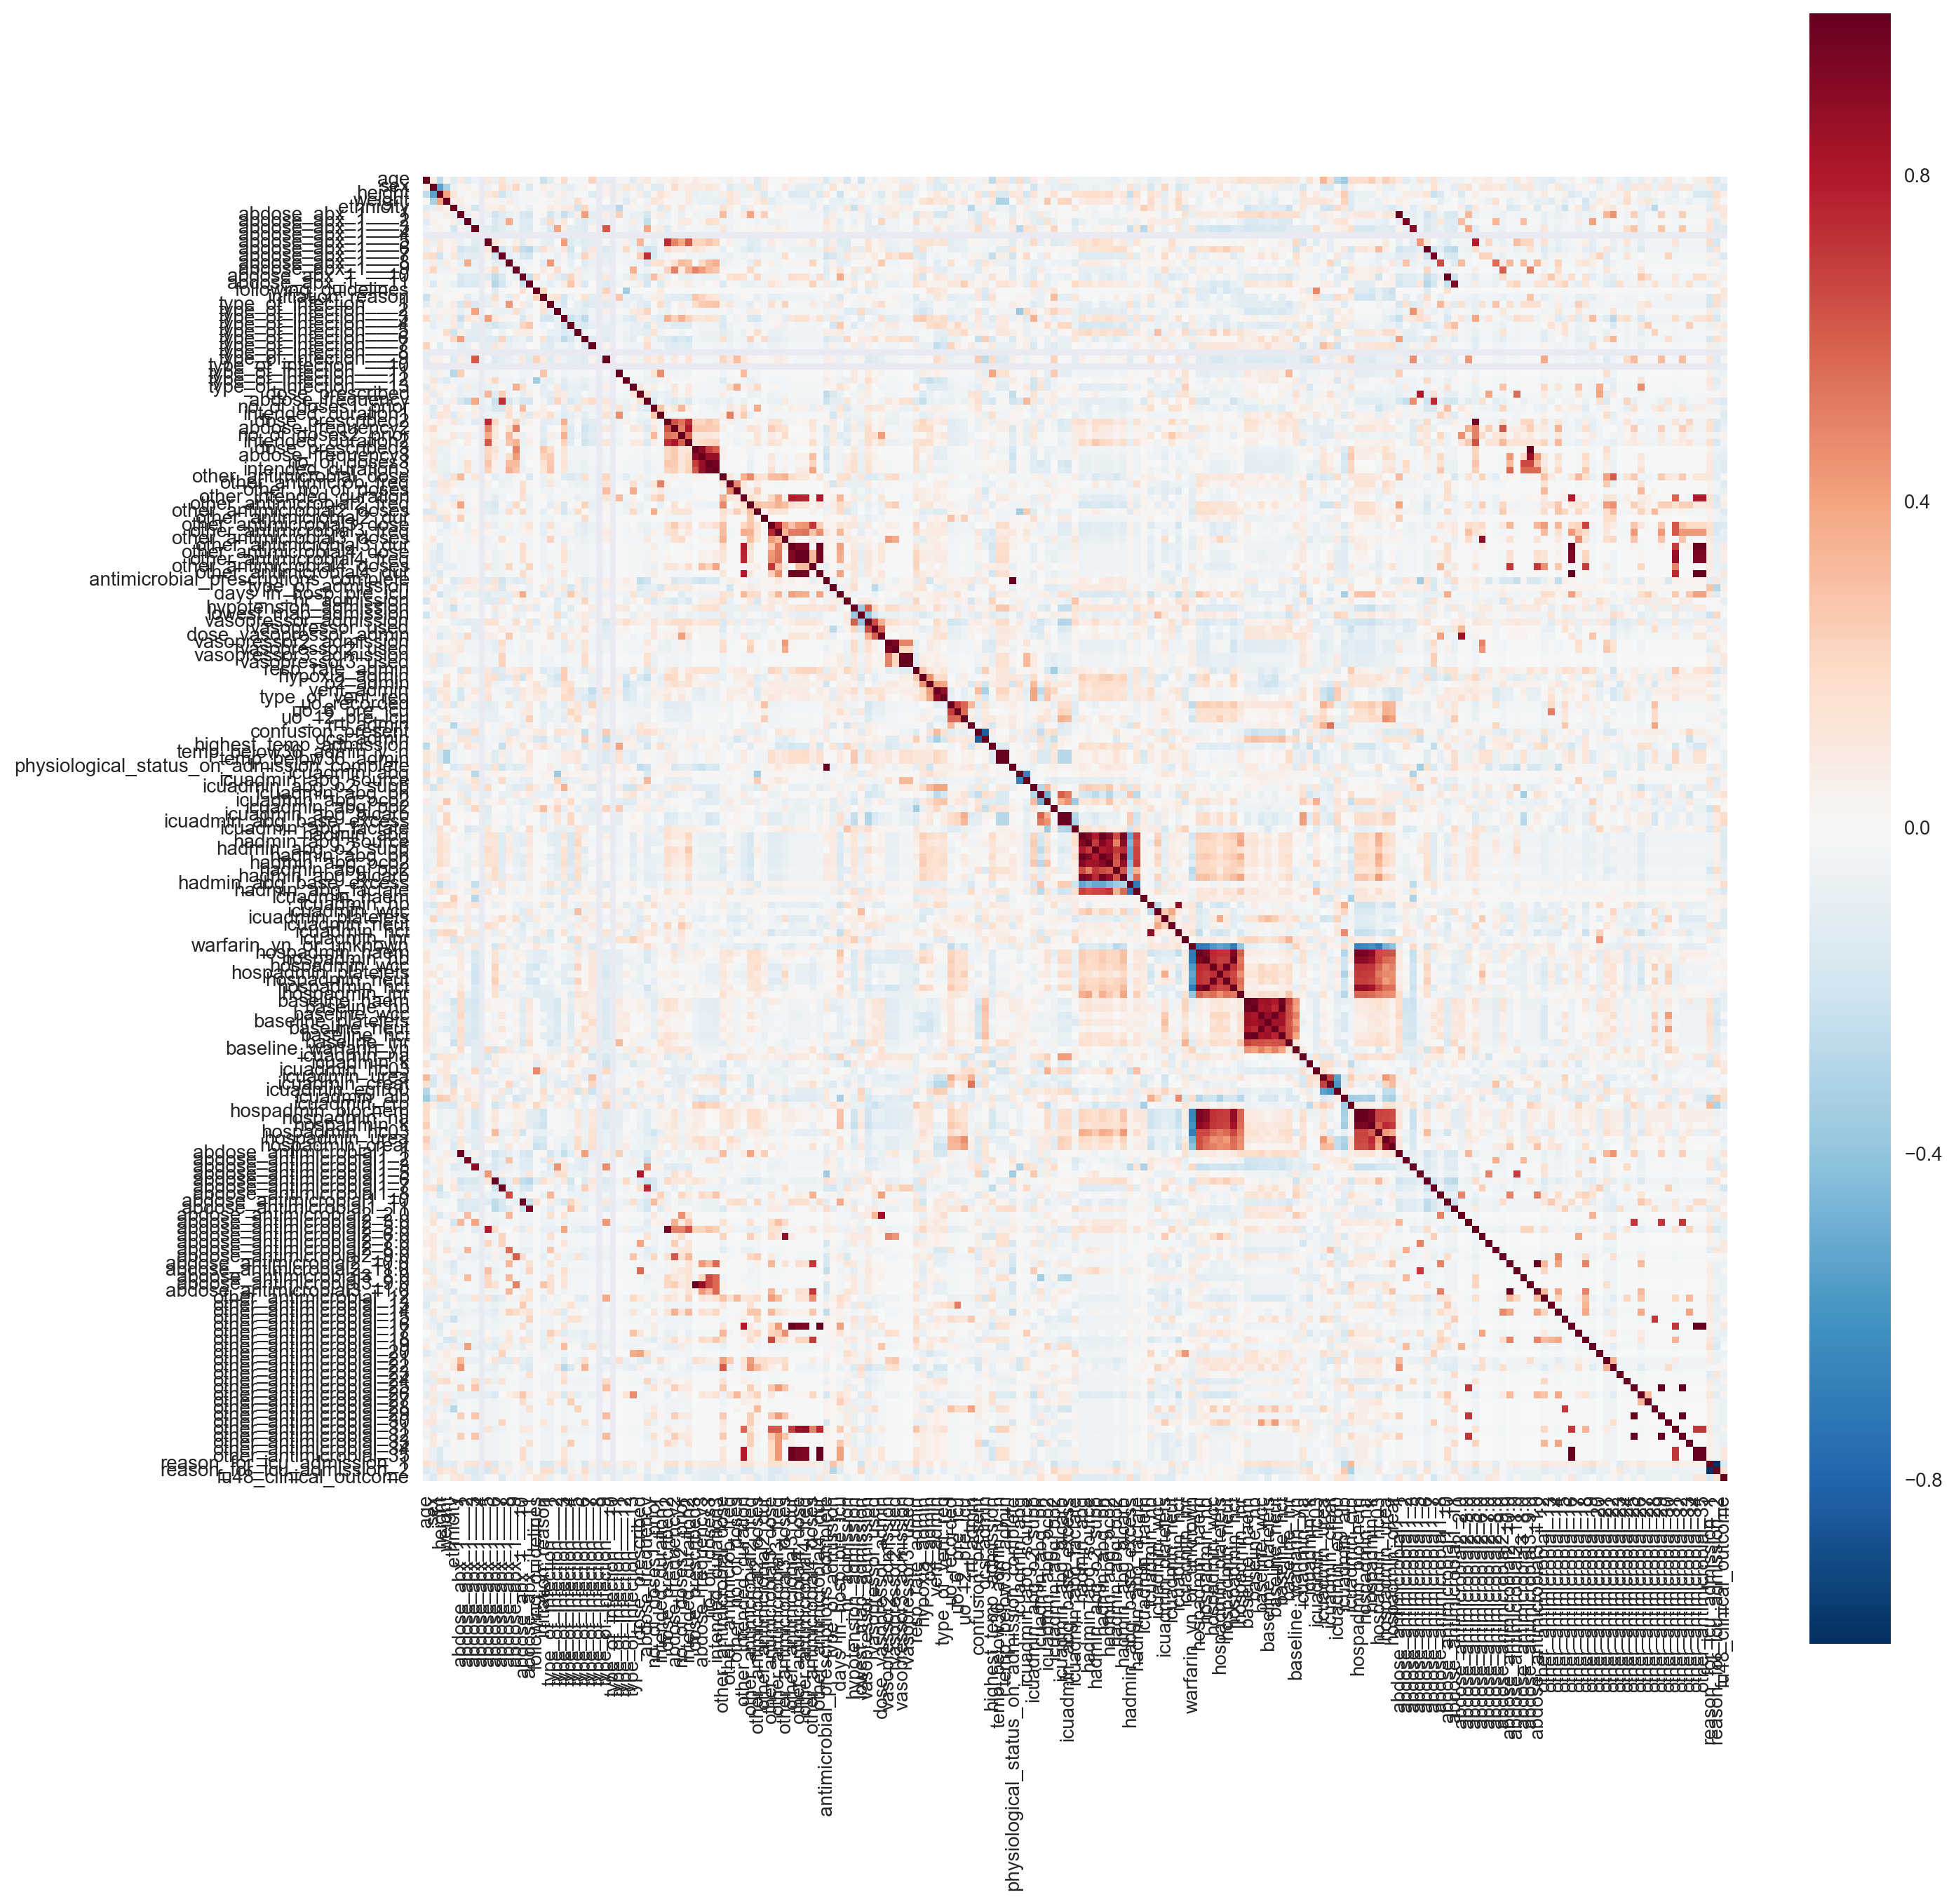

In [12]:
corrmat_48h = sample_48h.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat_48h, vmax=.8, square=True)

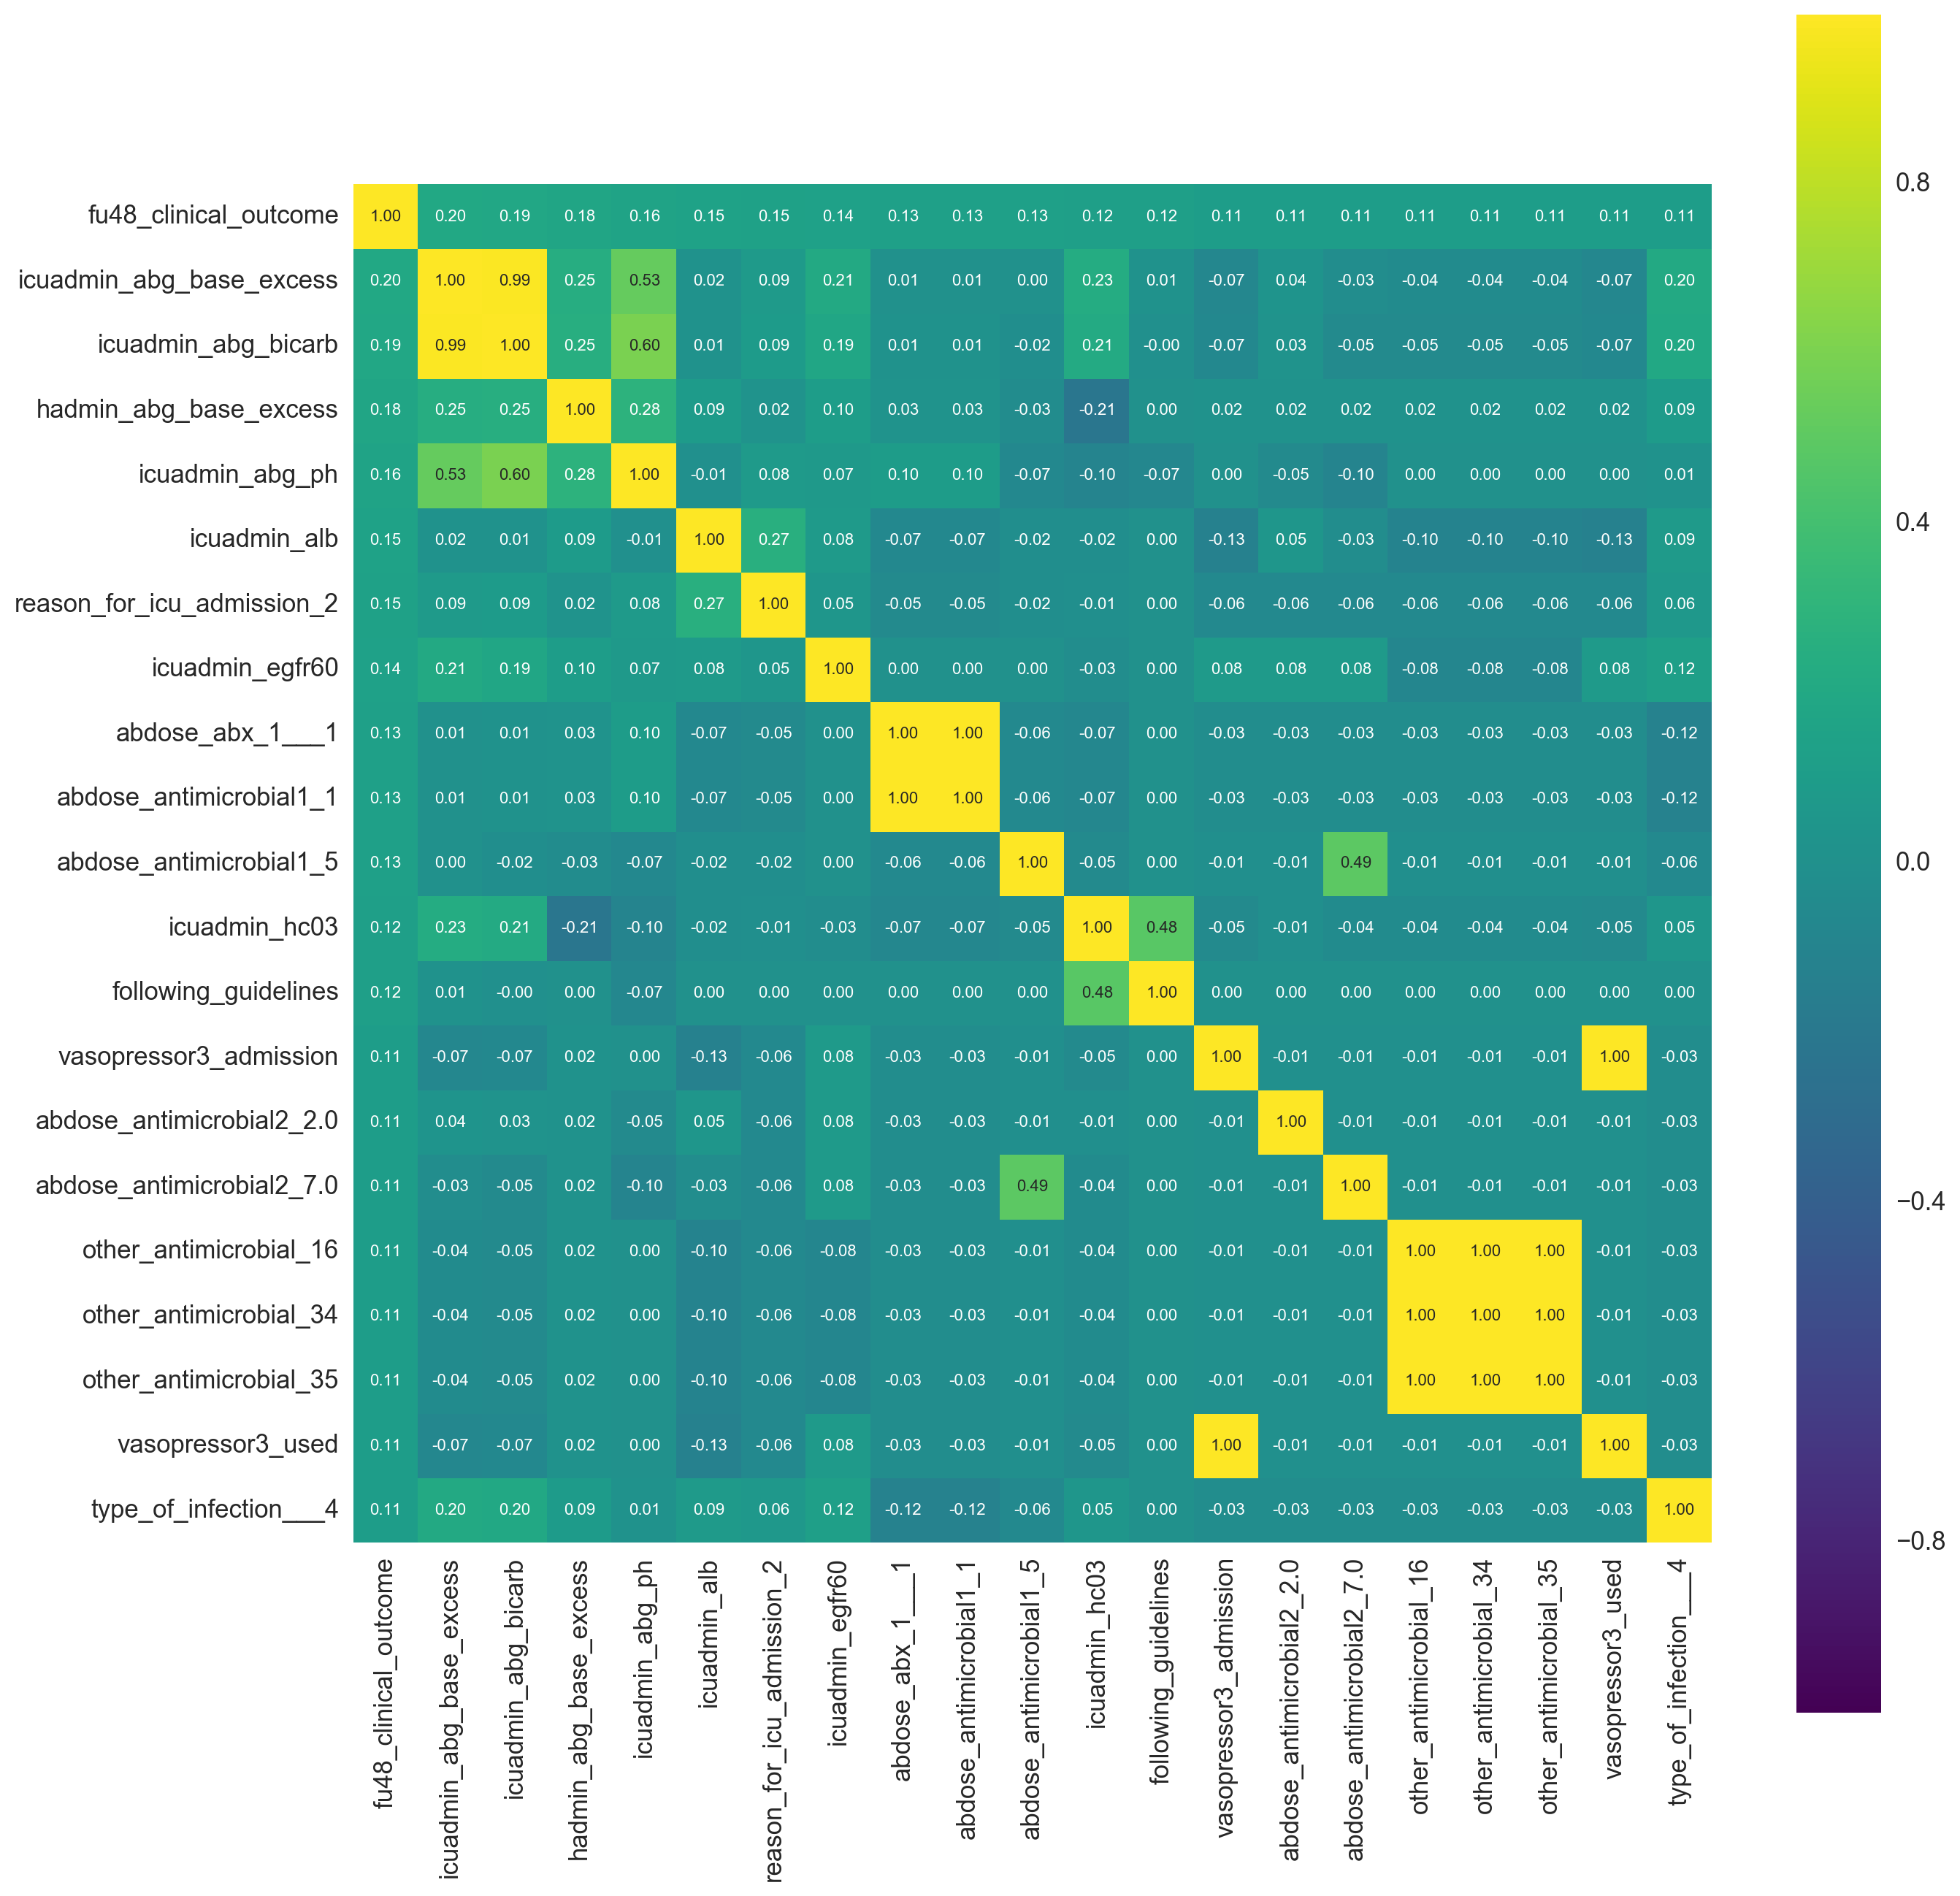

In [13]:
# 48h follow up outcome correlation matrix
k = 21
cols = corrmat_48h.nlargest(k, 'fu48_clinical_outcome')['fu48_clinical_outcome'].index
cols = cols.unique()
cm = np.corrcoef(sample_48h[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, cmap='viridis', annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, \
                yticklabels=cols.values, xticklabels=cols.values)

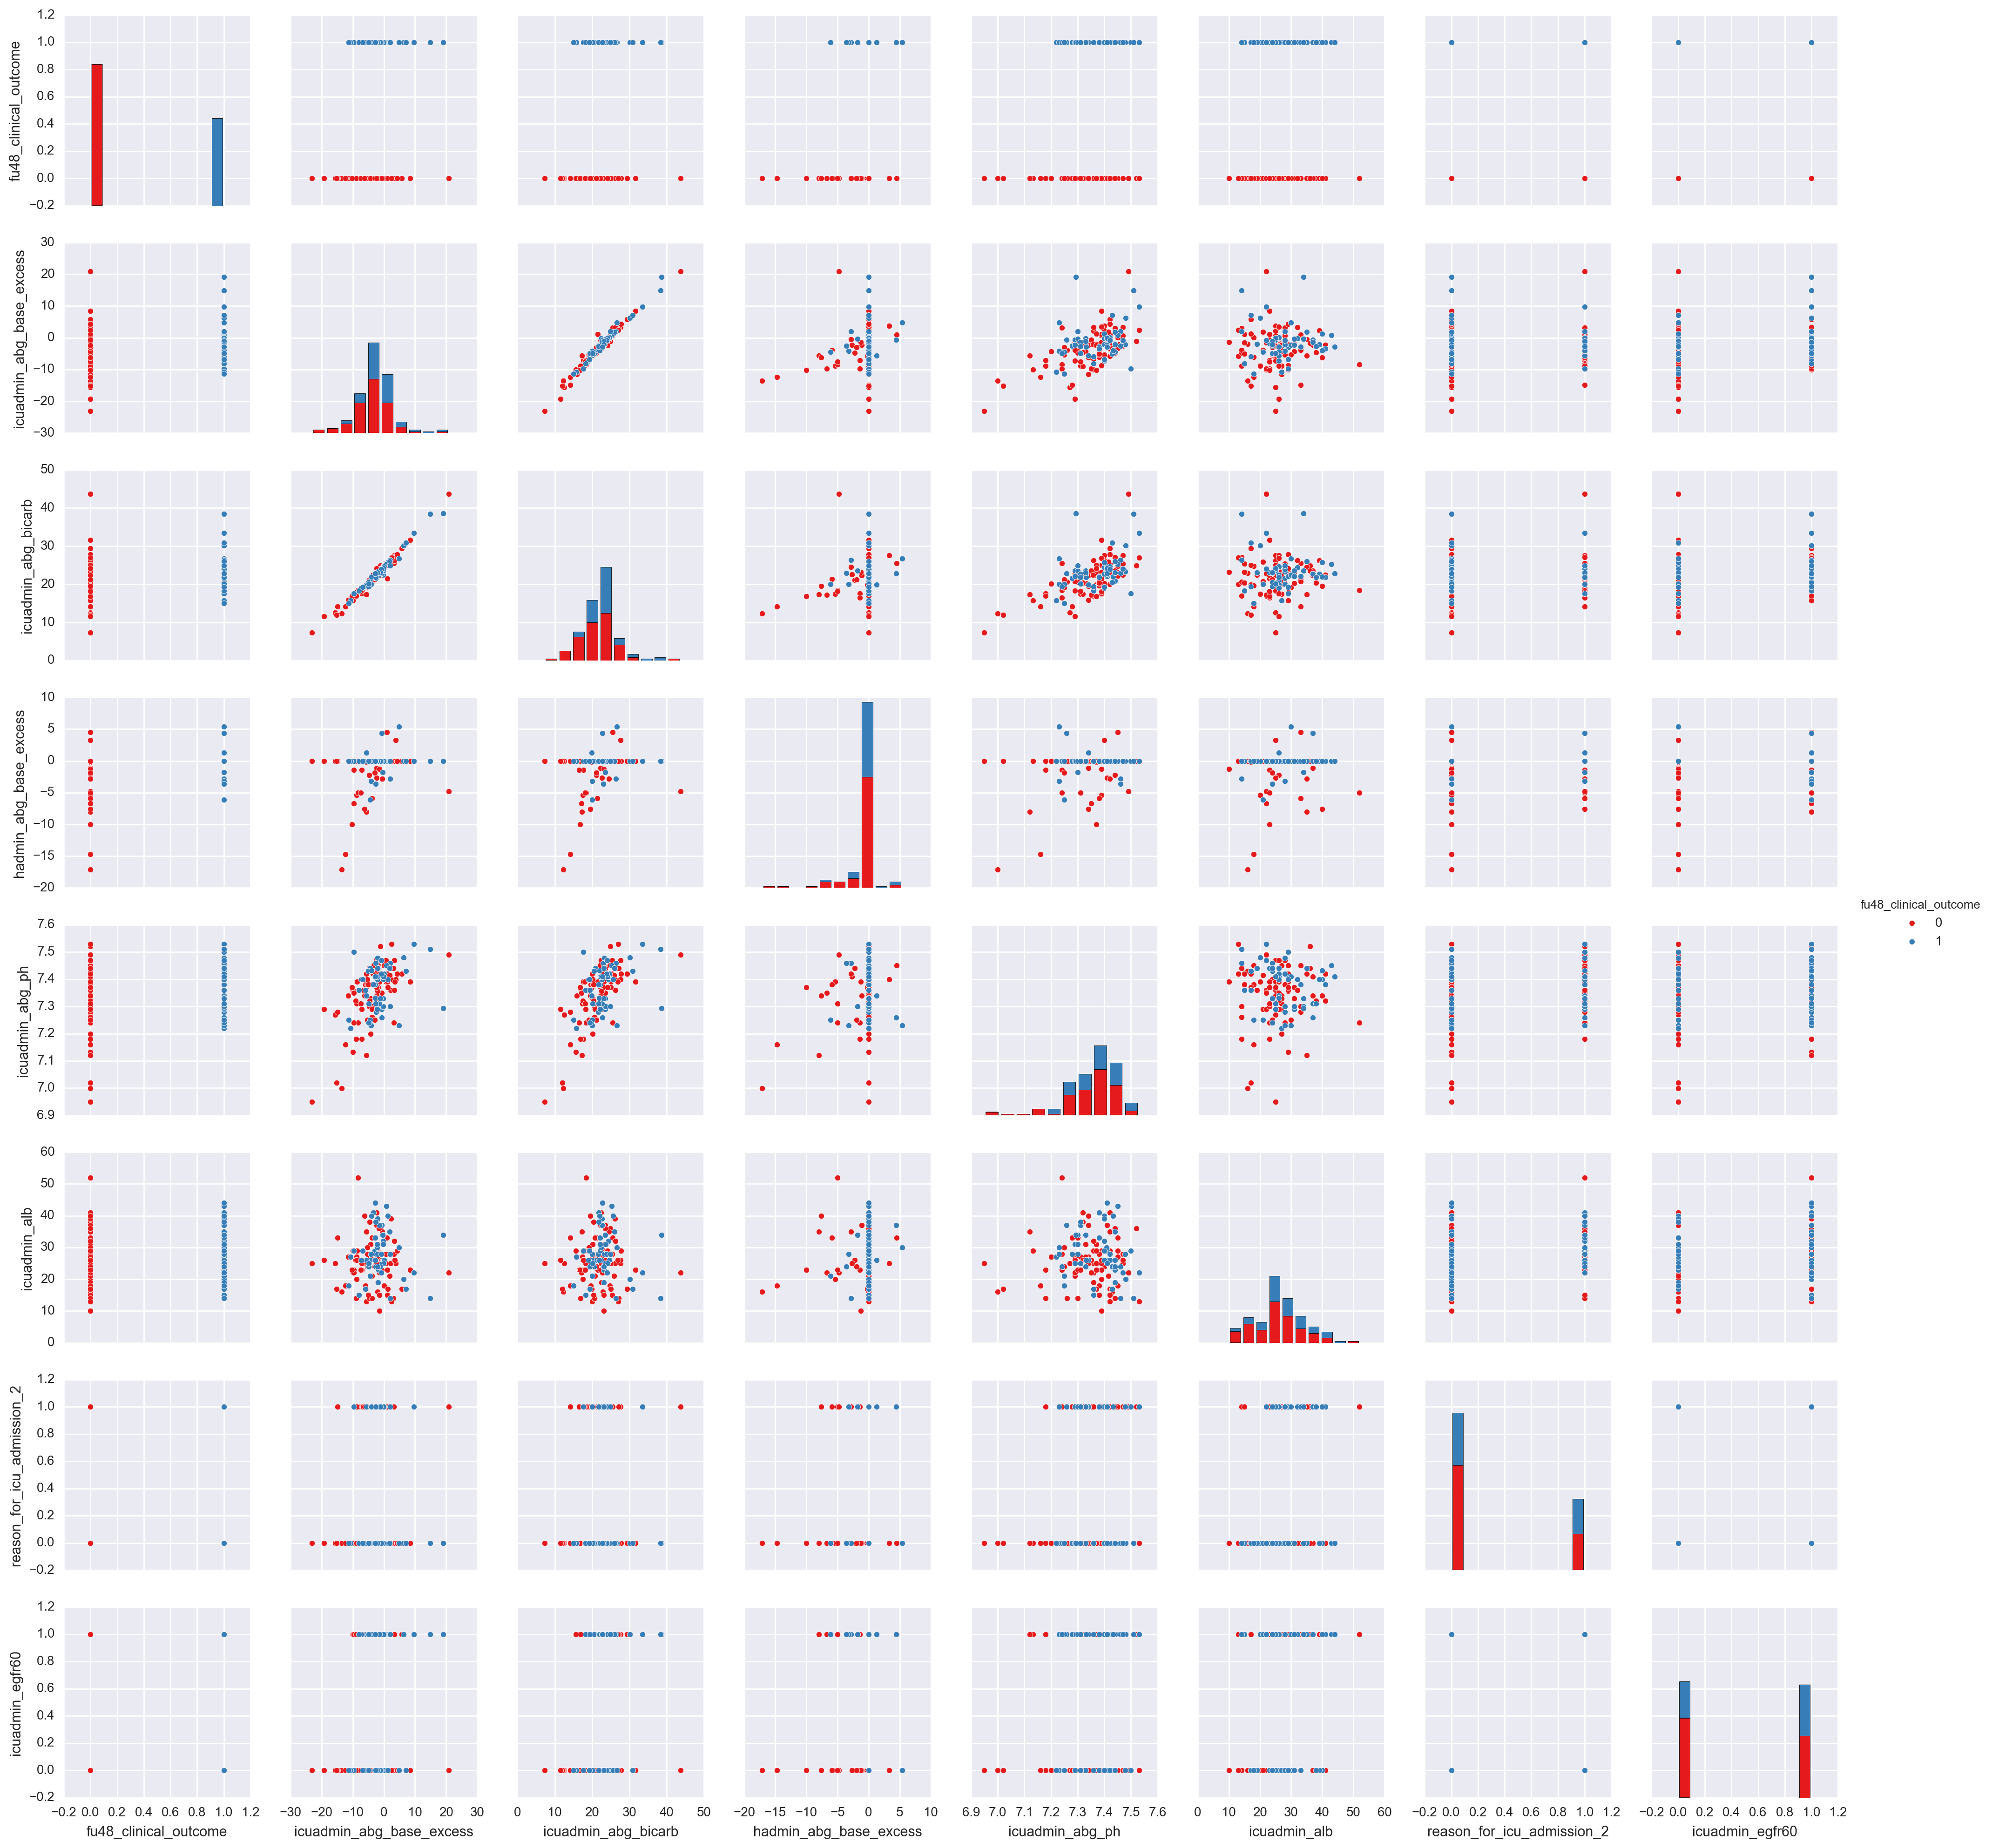

In [14]:
# 48h follow up scatter
sns.set()
cols = ['fu48_clinical_outcome',
        'icuadmin_abg_base_excess',
        'icuadmin_abg_bicarb',
        'hadmin_abg_base_excess',
        'icuadmin_abg_ph',
        'icuadmin_alb',
        'reason_for_icu_admission_2',
        'icuadmin_egfr60']
sns.pairplot(sample_48h[cols], hue='fu48_clinical_outcome', size=2.5, palette='Set1')

In [15]:
X = sample_48h.drop(['fu48_clinical_outcome'], axis=1)
Y = sample_48h['fu48_clinical_outcome']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [16]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
    return(rmse)

In [17]:
# np.any(np.isnan(sample_48h))
# np.all(np.isfinite(sample_48h))

In [18]:
model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 105, 140, 180, 225, 275]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

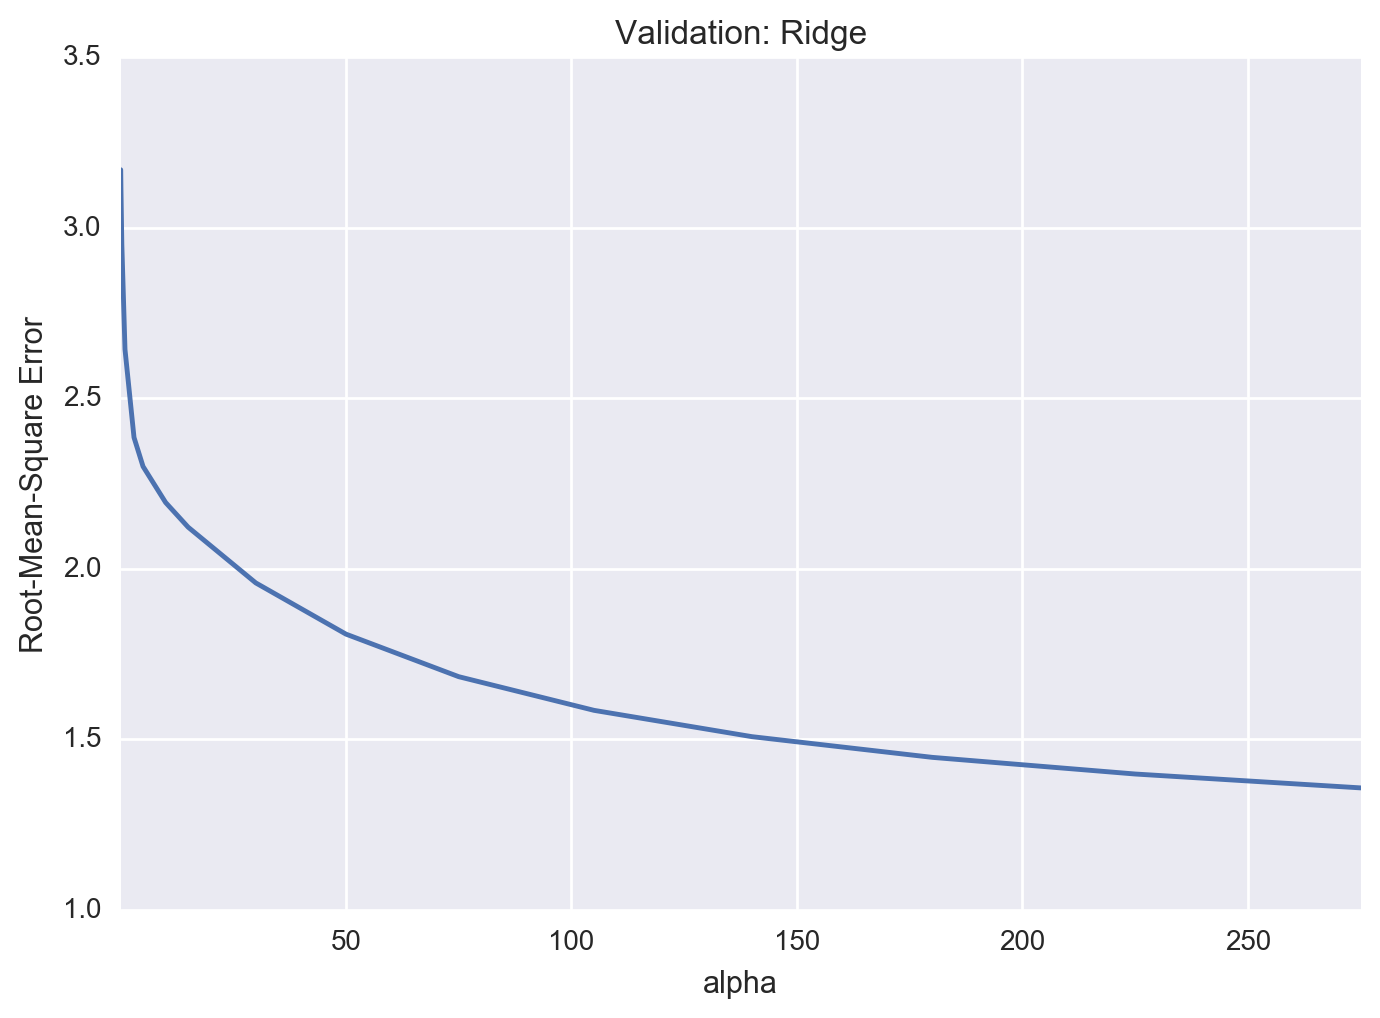

In [19]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation: Ridge")
plt.xlabel("alpha")
plt.ylabel("Root-Mean-Square Error")

In [46]:
model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.0005], 
                      copy_X=True, 
                      cv=None, 
                      eps=0.001,
                      fit_intercept=False, 
                      max_iter=1000, 
                      n_alphas=100, 
                      n_jobs=1,
                      normalize=False, 
                      positive=False, 
                      precompute='auto', 
                      random_state=None,
                      selection='cyclic', 
                      tol=0.0001, 
                      verbose=False)

model_lasso.fit(X_train, y_train)
rmse_cv(model_lasso).mean()

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.54610226288365726

In [47]:
coef_lasso = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef_lasso!=0)) + " variables and eliminated the other " +\
      str(sum(coef_lasso==0)) + " variables")

Lasso picked 16 variables and eliminated the other 172 variables


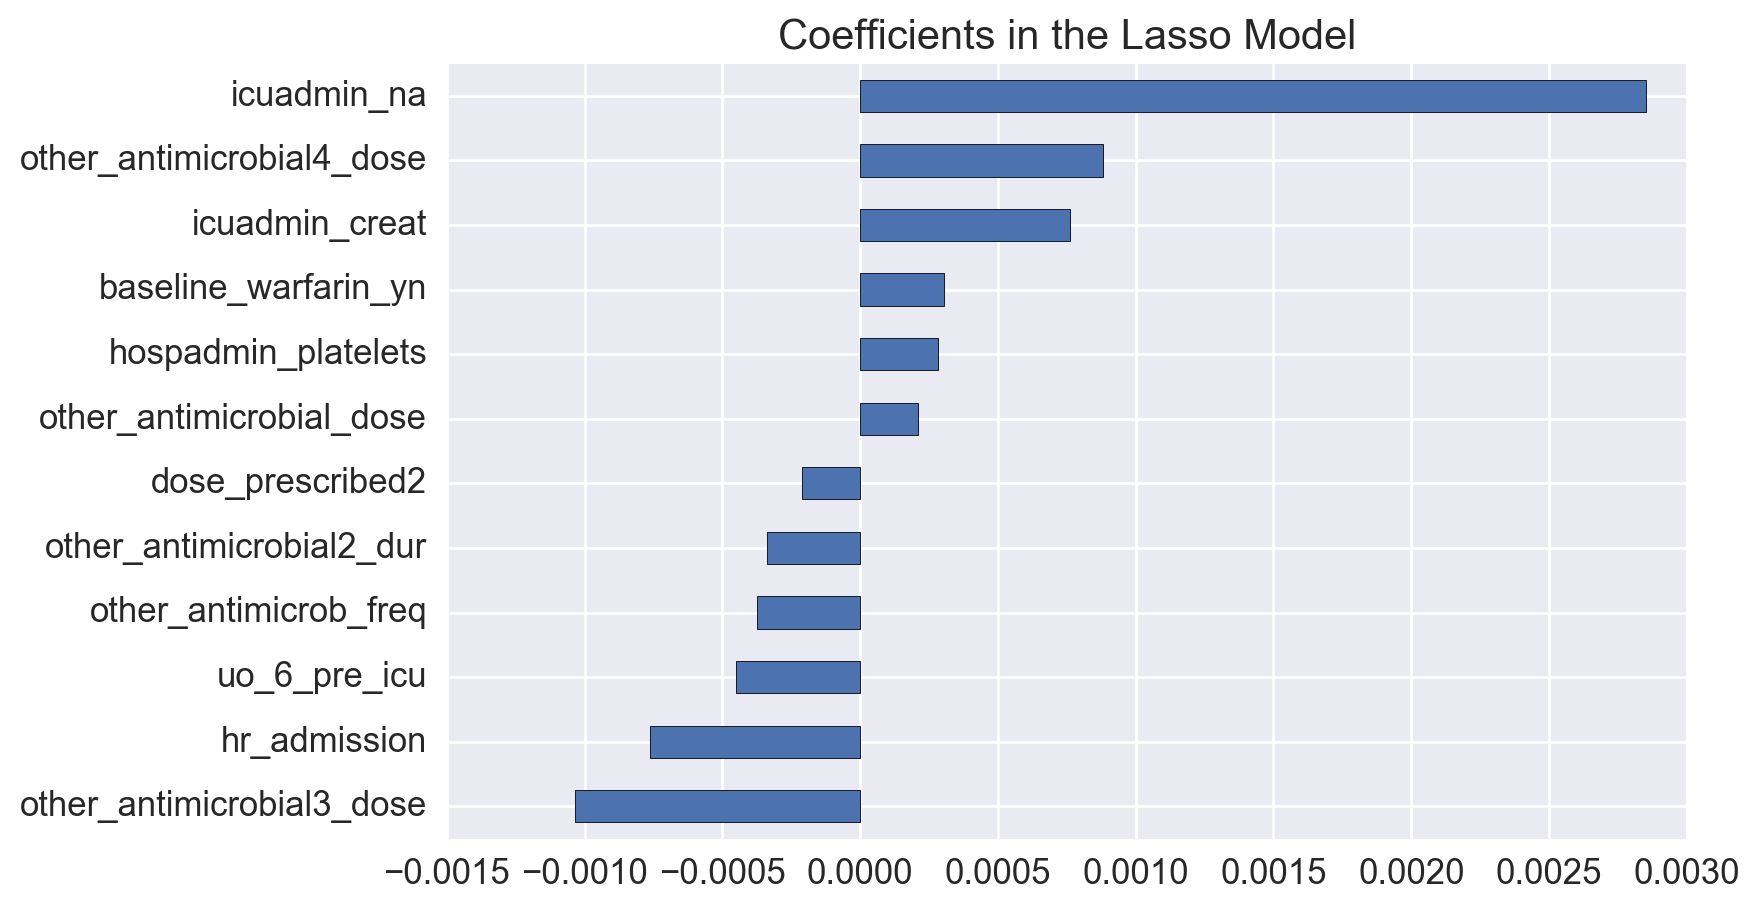

In [48]:
imp_coef_lasso = pd.concat([coef_lasso.sort_values().head(6),
                            coef_lasso.sort_values().tail(6)])

plt.rcParams['figure.figsize'] = (8.0, 5.0)
imp_coef_lasso.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [49]:
model_EN = ElasticNetCV(alphas=[1, 0.1, 0.001, 0.0005], 
                        copy_X=True, 
                        cv=None, 
                        eps=0.001, 
                        fit_intercept=False,
                        l1_ratio=0.5, 
                        max_iter=1000, 
                        n_alphas=100, 
                        n_jobs=1,
                        normalize=False, 
                        positive=False, 
                        precompute='auto',
                        random_state=None, 
                        selection='cyclic', 
                        tol=0.0001, 
                        verbose=0)

model_EN.fit(X_train, y_train)
rmse_cv(model_EN).mean()

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.56990135254959995

In [50]:
coef_EN = pd.Series(model_EN.coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coef_EN!=0)) + " variables and eliminated the other " +\
      str(sum(coef_EN==0)) + " variables")

Elastic Net picked 25 variables and eliminated the other 163 variables


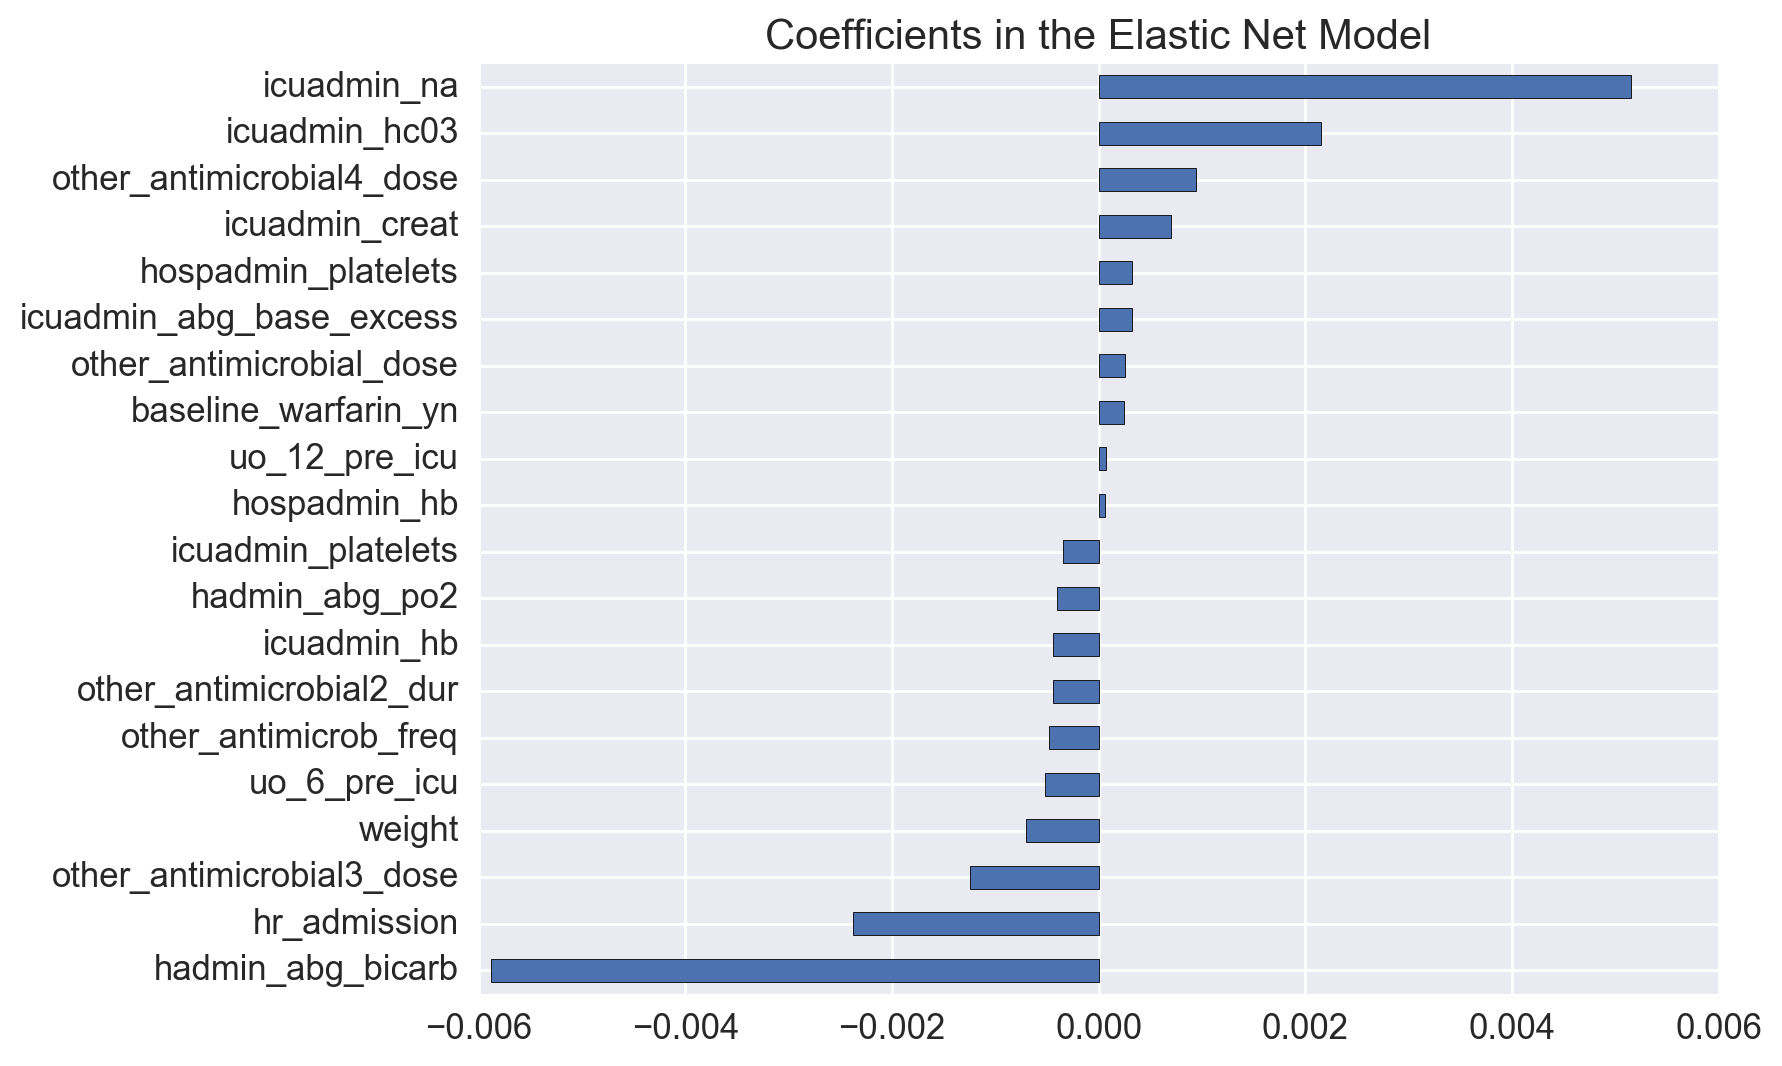

In [51]:
imp_coef_EN = pd.concat([coef_EN.sort_values().head(10),
                         coef_EN.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 6.0)
imp_coef_EN.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

When using default regularisation parameter both Lasso and Elastic Net would only keep 'baseline_warfarin_yn'.

Fitting different classifiers with predictors chosen by Lasso

In [52]:
coef_lasso = coef_lasso[coef_lasso!=0]
X = sample_48h[coef_lasso.index]
Y = sample_48h['fu48_clinical_outcome']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [53]:
# SVM
clf_svc = svm.SVC()
clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


In [54]:
# Logistic regression with XGBoost
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.25%


In [55]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.17%


In [56]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.partial_fit(X_train, y_train, np.unique(y_train))

y_pred = nb_clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.92%


Fitting different classifiers with predictors chosen by Elastic Net

In [57]:
coef_En = coef_EN[coef_EN!=0]
X = sample_48h[coef_EN.index]
Y = sample_48h['fu48_clinical_outcome']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [58]:
# SVM
clf_svc = svm.SVC()
clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


In [59]:
# Logistic regression with XGBoost
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.25%


In [60]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.75%


In [61]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.partial_fit(X_train, y_train, np.unique(y_train))

y_pred = nb_clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


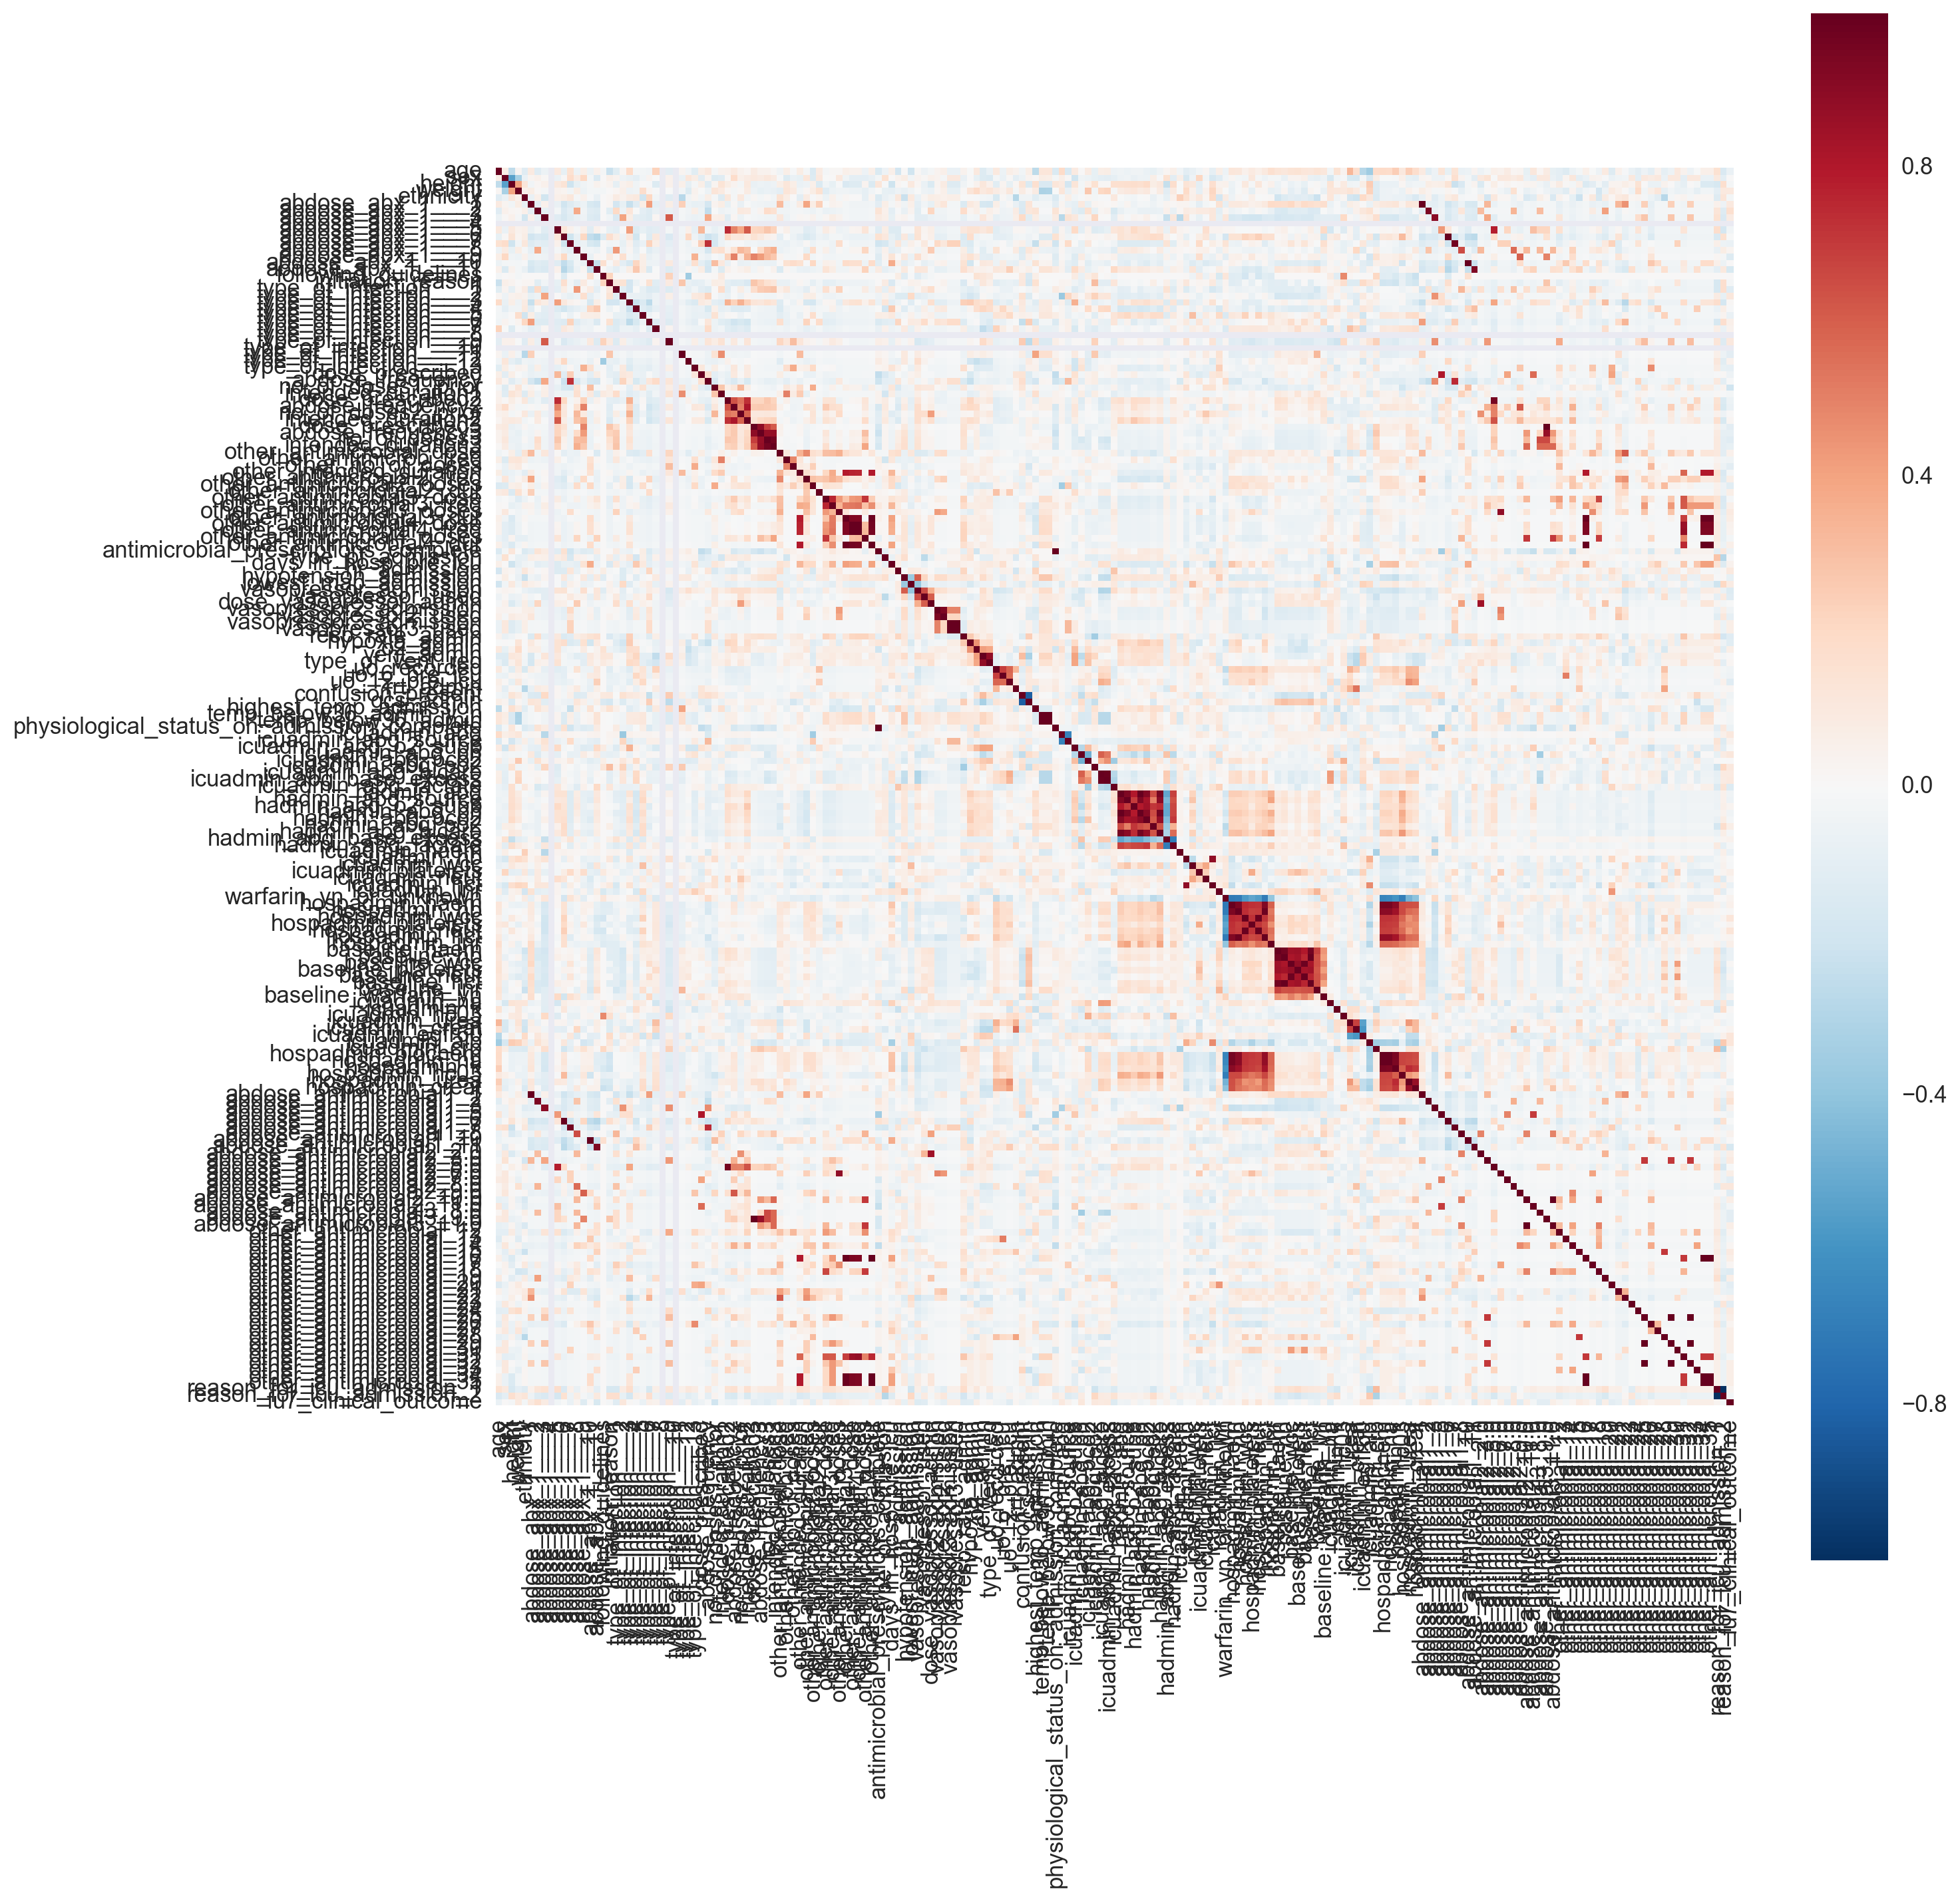

In [64]:
corrmat_7d = sample_7d.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat_7d, vmax=.8, square=True)

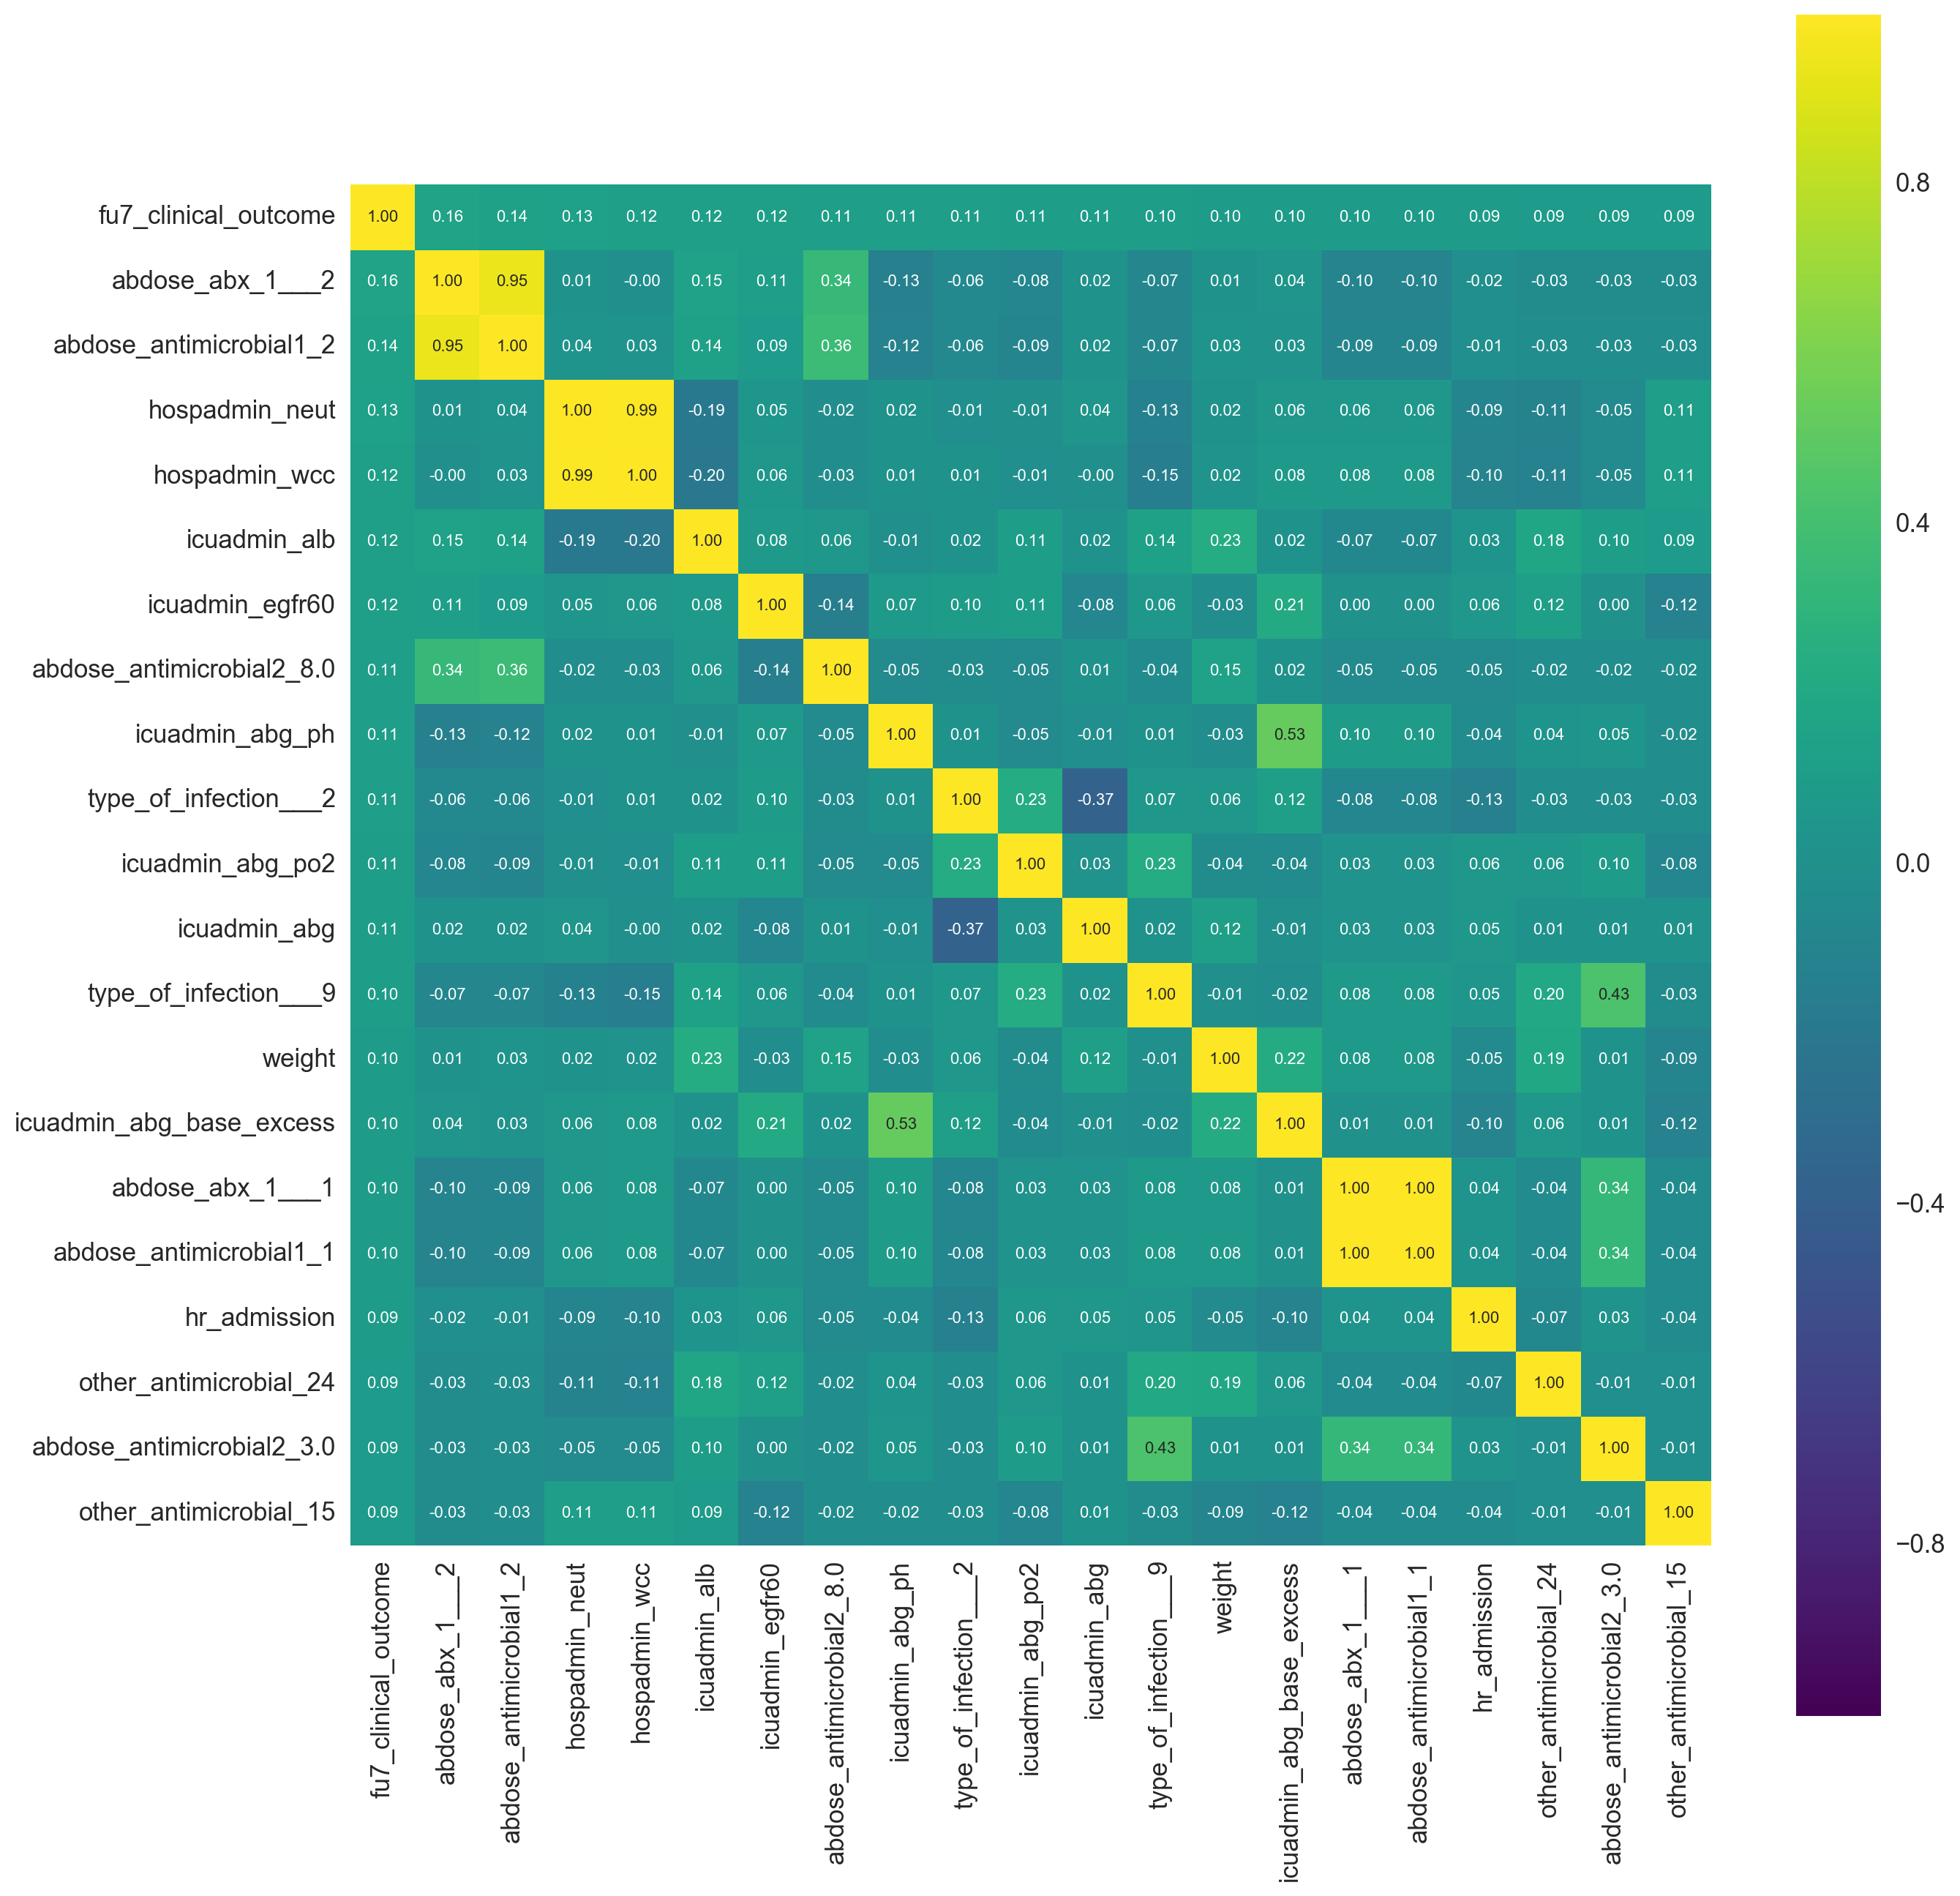

In [65]:
#7d follow up outcome correlation matrix
k = 21
cols = corrmat_7d.nlargest(k, 'fu7_clinical_outcome')['fu7_clinical_outcome'].index
cols = cols.unique()
cm = np.corrcoef(sample_7d[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, cmap='viridis', annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, \
                yticklabels=cols.values, xticklabels=cols.values)

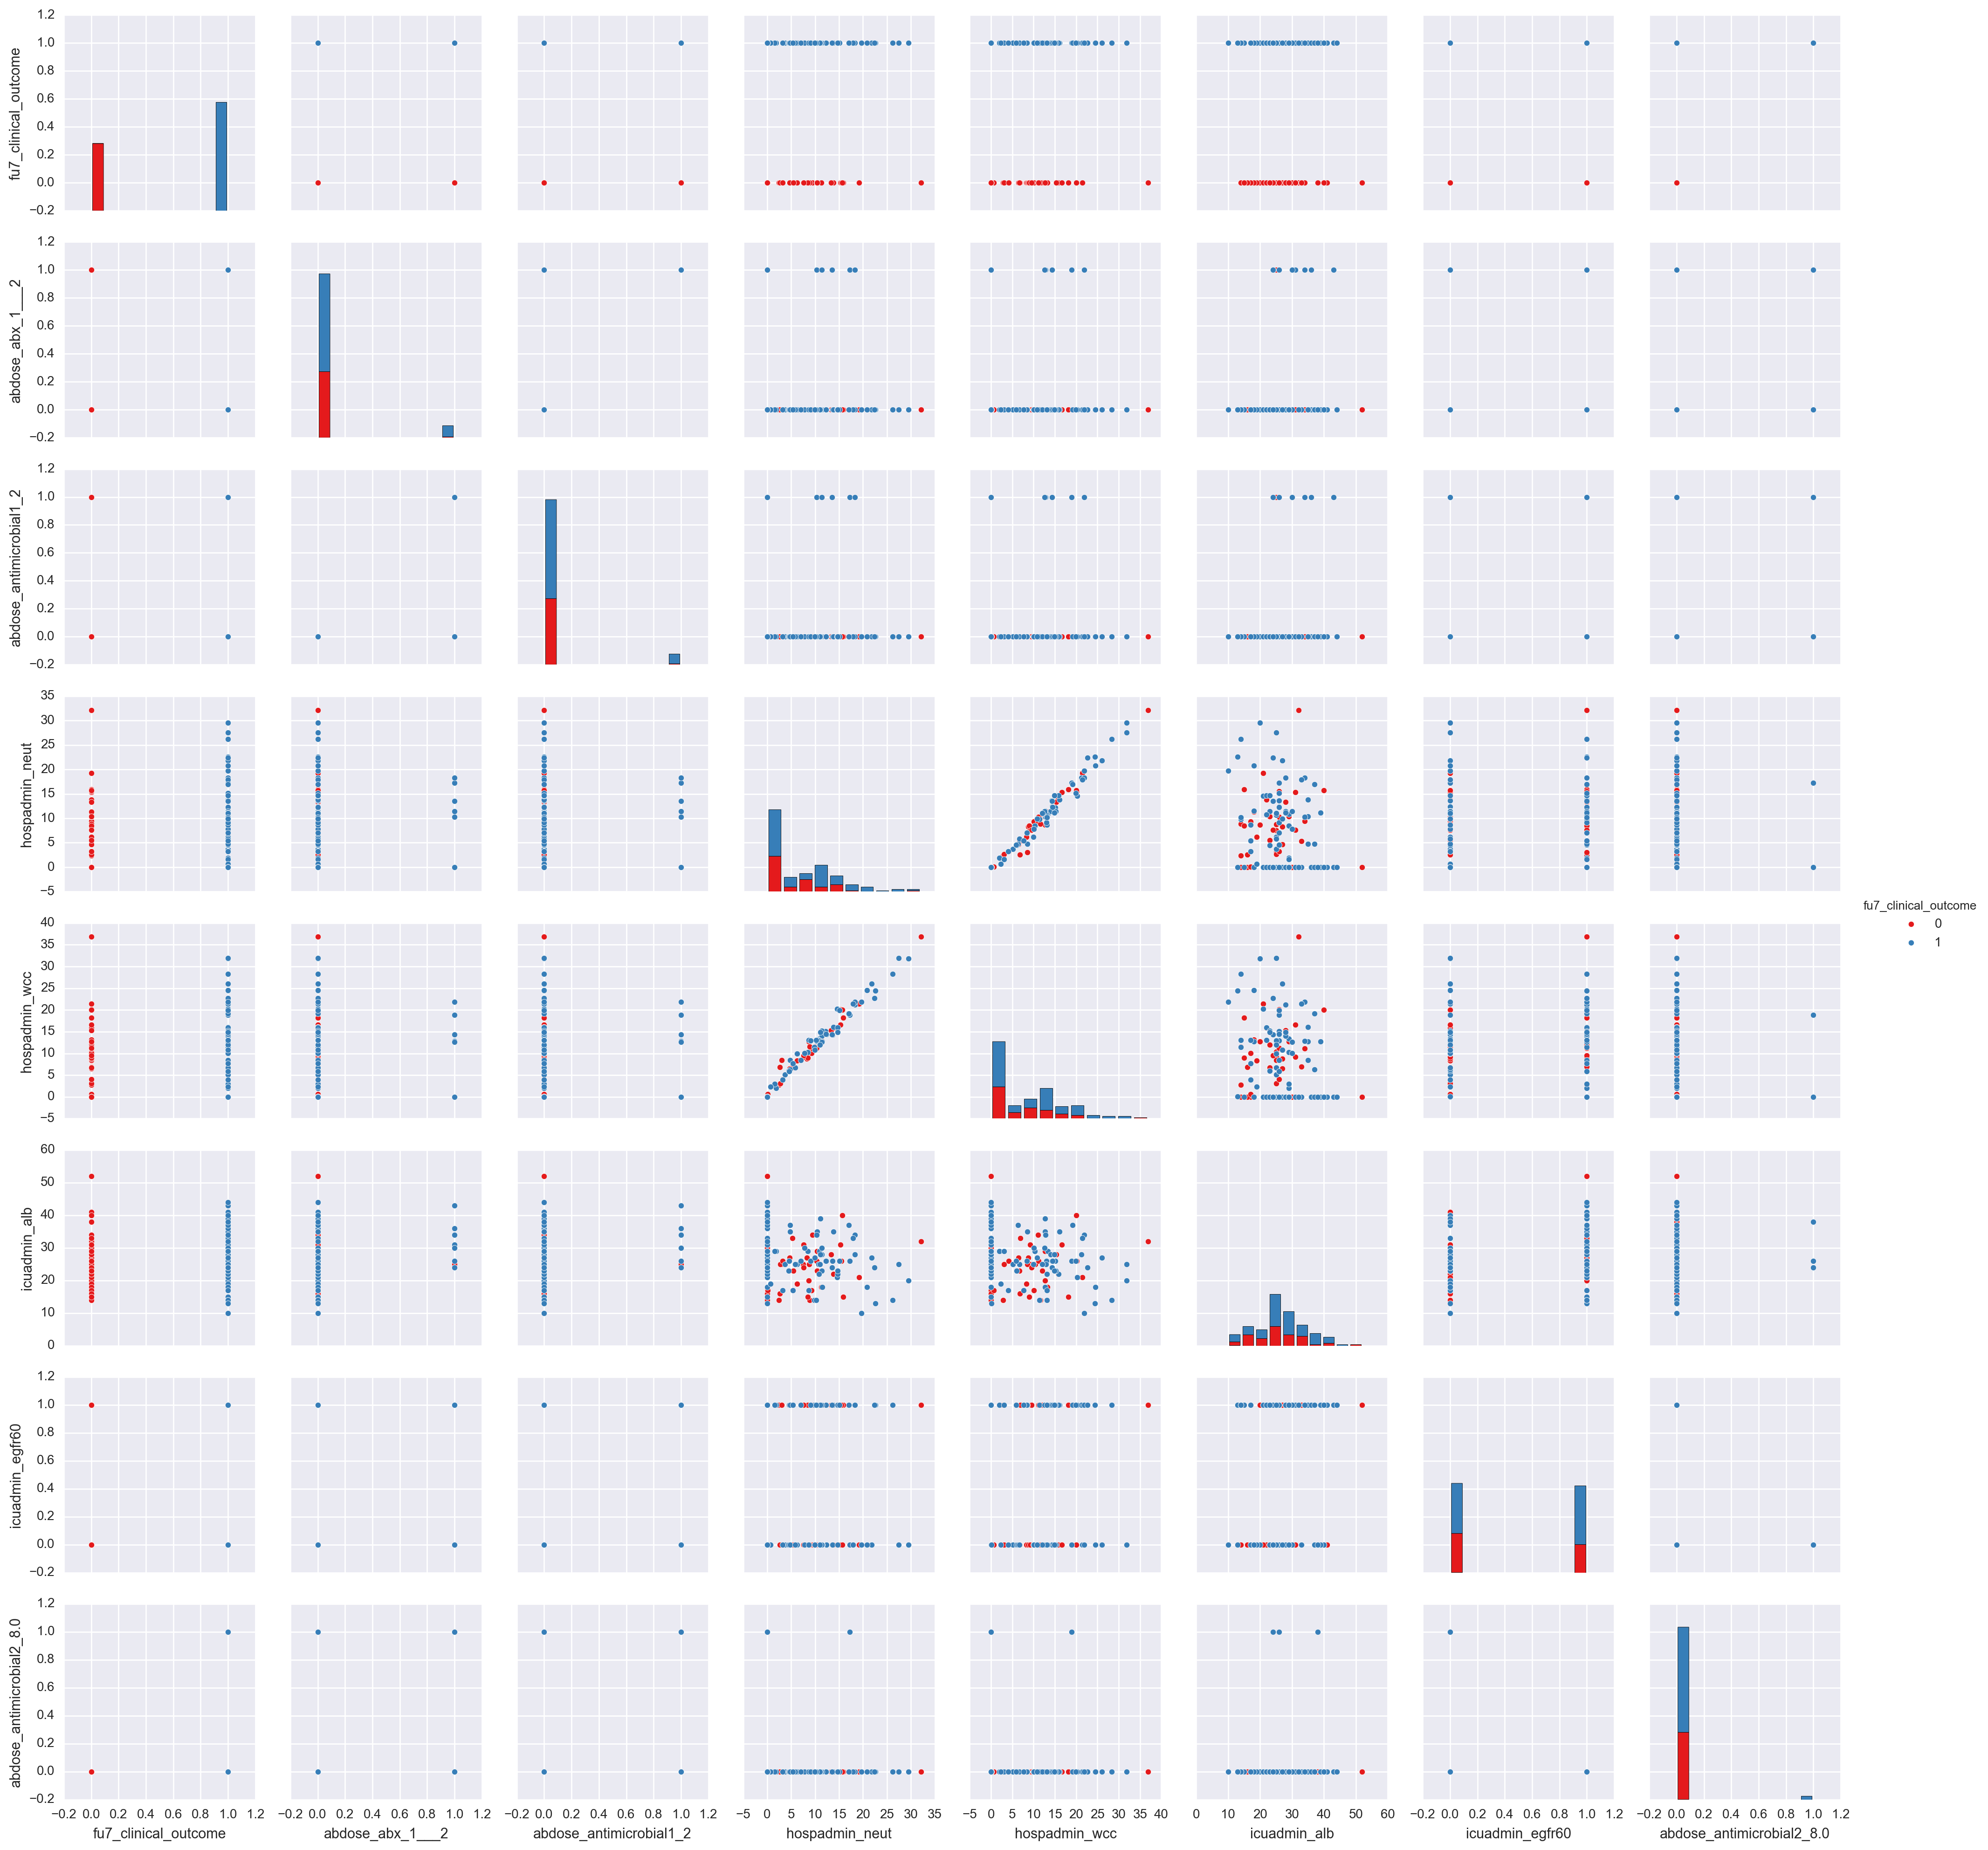

In [66]:
# 7d follow up scatter
sns.set()
cols = ['fu7_clinical_outcome',
        'abdose_abx_1___2',
        'abdose_antimicrobial1_2',
        'hospadmin_neut',
        'hospadmin_wcc',
        'icuadmin_alb',
        'icuadmin_egfr60',
        'abdose_antimicrobial2_8.0']
sns.pairplot(sample_7d[cols], hue='fu7_clinical_outcome', size=2.5, palette='Set1')

In [67]:
X = sample_7d.drop(['fu7_clinical_outcome'], axis=1)
Y = sample_7d['fu7_clinical_outcome']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [68]:
model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.0005], 
                      copy_X=True, 
                      cv=None, 
                      eps=0.001,
                      fit_intercept=False, 
                      max_iter=1000, 
                      n_alphas=100, 
                      n_jobs=1,
                      normalize=False, 
                      positive=False, 
                      precompute='auto', 
                      random_state=None,
                      selection='cyclic', 
                      tol=0.0001, 
                      verbose=False)

model_lasso.fit(X_train, y_train)
rmse_cv(model_lasso).mean()

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.56769667250074418

In [69]:
coef_lasso = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef_lasso!=0)) + " variables and eliminated the other " +\
      str(sum(coef_lasso==0)) + " variables")

Lasso picked 20 variables and eliminated the other 168 variables


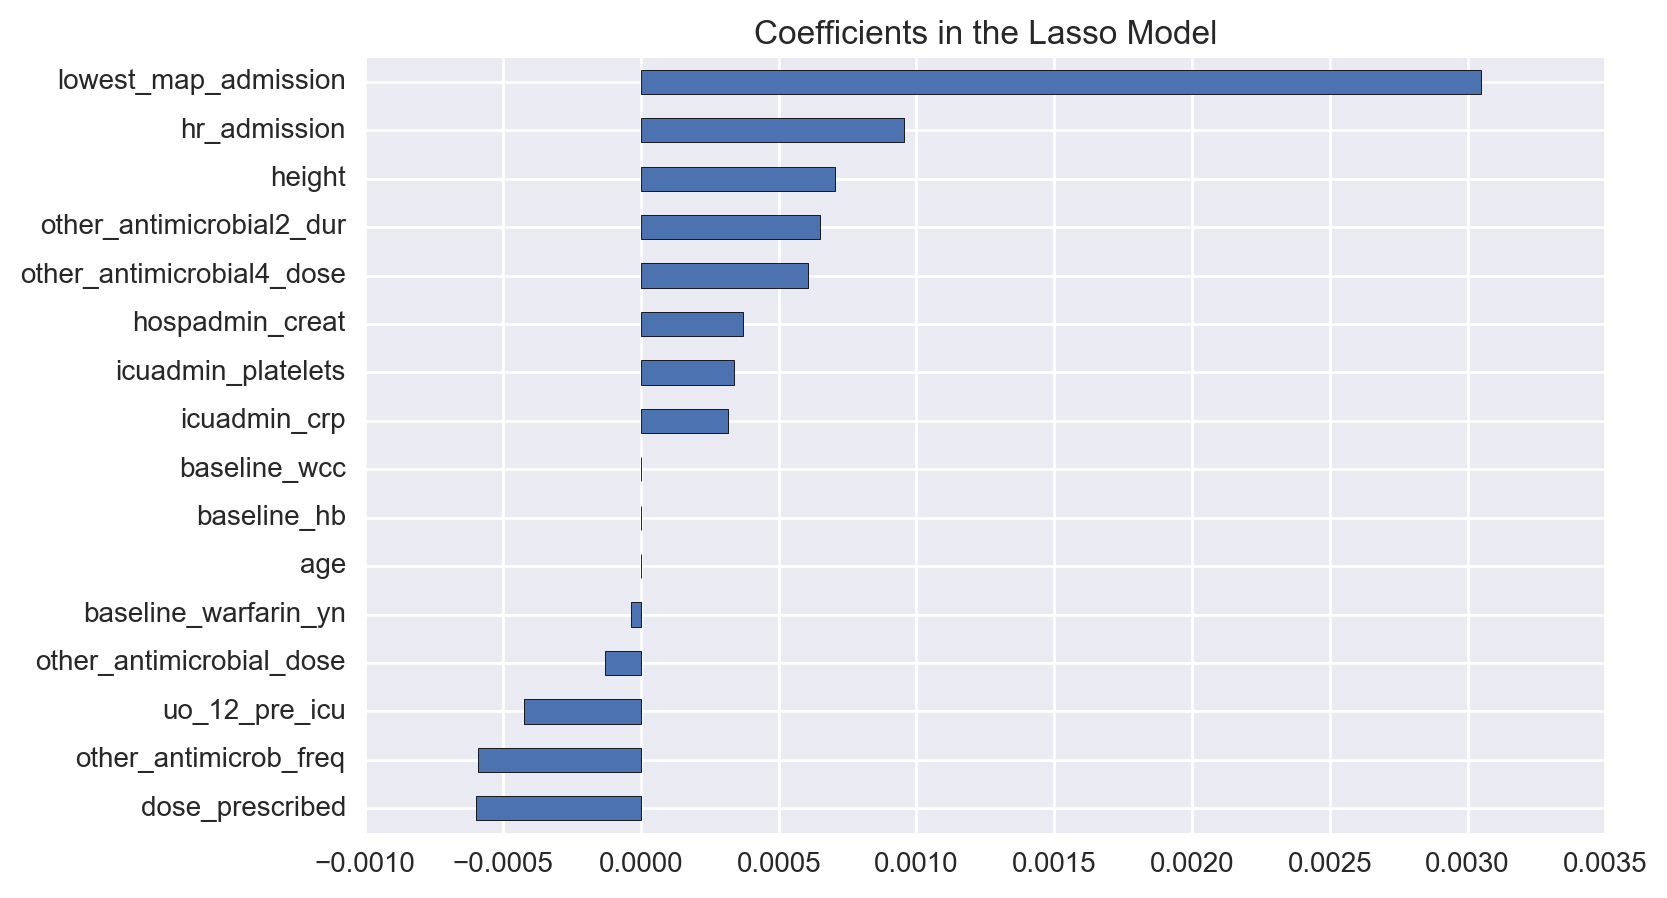

In [70]:
imp_coef_lasso = pd.concat([coef_lasso.sort_values().head(8),
                            coef_lasso.sort_values().tail(8)])

plt.rcParams['figure.figsize'] = (8.0, 5.0)
imp_coef_lasso.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [71]:
model_EN = ElasticNetCV(alphas=[1, 0.1, 0.001, 0.0005], 
                        copy_X=True, 
                        cv=None, 
                        eps=0.001, 
                        fit_intercept=False,
                        l1_ratio=0.5, 
                        max_iter=1000, 
                        n_alphas=100, 
                        n_jobs=1,
                        normalize=False, 
                        positive=False, 
                        precompute='auto',
                        random_state=None, 
                        selection='cyclic', 
                        tol=0.0001, 
                        verbose=0)

model_EN.fit(X_train, y_train)
rmse_cv(model_EN).mean()

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.58138078372623725

In [72]:
coef_EN = pd.Series(model_EN.coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coef_EN!=0)) + " variables and eliminated the other " +\
      str(sum(coef_EN==0)) + " variables")

Elastic Net picked 25 variables and eliminated the other 163 variables


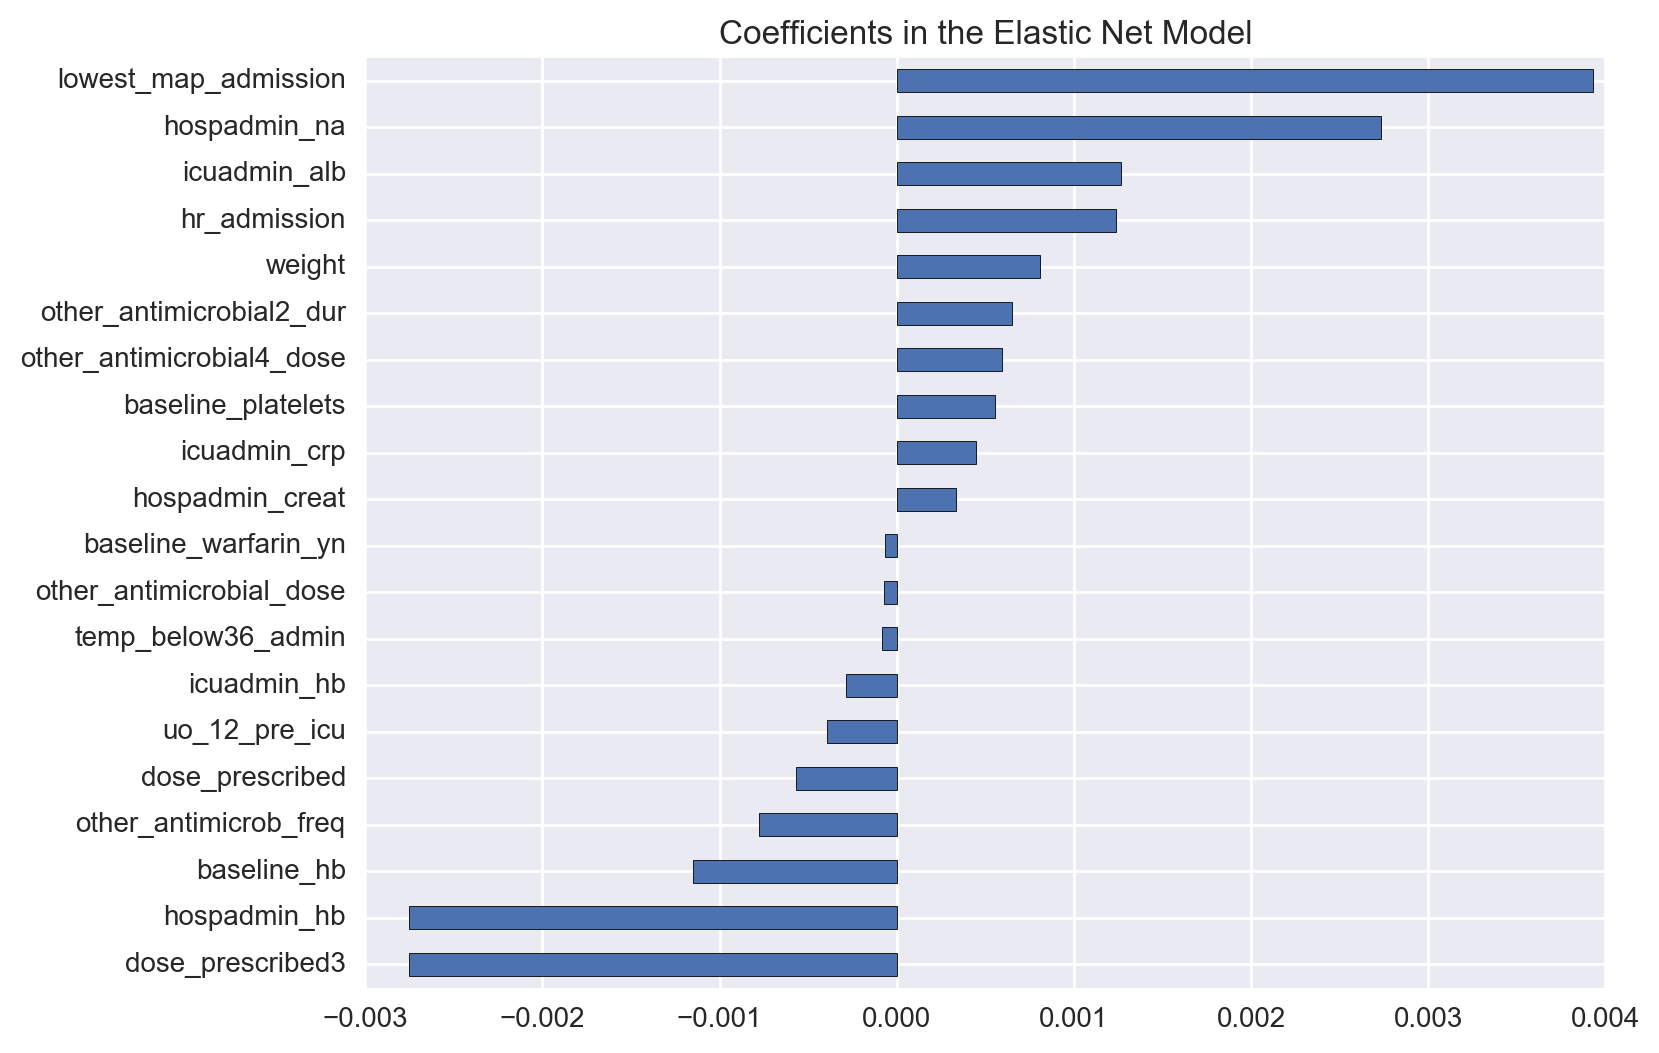

In [73]:
imp_coef_EN = pd.concat([coef_EN.sort_values().head(10),
                         coef_EN.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 6.0)
imp_coef_EN.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

Fitting different classifiers with predictors chosen by Lasso

In [74]:
coef_lasso = coef_lasso[coef_lasso!=0]
X = sample_7d[coef_lasso.index]
Y = sample_7d['fu7_clinical_outcome']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [75]:
# SVM
clf_svc = svm.SVC()
clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.67%


In [76]:
# Logistic regression with XGBoost
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.83%


In [77]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.42%


In [78]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.partial_fit(X_train, y_train, np.unique(y_train))

y_pred = nb_clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 29.17%
